<div style="color:white;
           display:fill;
           border-radius:1px;
           background-color:#e35244;
           font-size:170%;
           font-family:Garamond;
           letter-spacing:0.5px">

<p style="padding: 1px;
          color:white;
          font-size:170%;
          text-align:center;">
    <h1>🚦 Road Accident Analysis</h1>
</p>
</div>

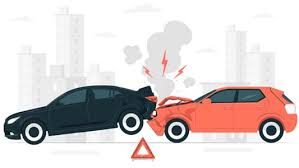

<div style="color:black;
           display:fill;
           background-color: #f7dc6f;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 23px;
        font-size:140%;
          text-align:center"

   **Overview**


Road accidents are a major public safety concern, leading to thousands of fatalities and injuries annually. Identifying key risk factors behind accident severity is crucial for **data-driven policymaking and road safety improvements**.

This project explores the **[Road Accident Severity in India](https://www.kaggle.com/datasets/s3programmer/road-accident-severity-in-india/data)** dataset ,applying **Exploratory Data Analysis (EDA), statistical testing, and visualization techniques** to uncover trends and actionable insights.

## 🔍 Key Focus Areas  

✅ **Data Cleaning & Preprocessing** – Handling missing values and ensuring data consistency.  
✅ **Feature Engineering** – Extracting meaningful features.  
✅ **Exploratory Data Analysis (EDA)** – Identifying patterns in accident severity based on various factors.  
✅ **Statistical Testing** – Validating relationships between severity and key risk factors.  
✅ **Data Visualization** – Using **Matplotlib & Seaborn** for intuitive representation of findings.  
✅ **Business Recommendations** – Providing insights for **road safety improvements** based on analysis.  
✅ **Predictive Modeling (Experimental)** – Testing a **Random Forest model** for accident severity classification (**not the core focus**).

## 📌🎯 Objective  
The goal of this project is to **derive meaningful insights from data** to help improve road safety rather than just building a predictive model. By analyzing accident patterns, this study provides recommendations to mitigate risks and reduce accident severity.  



<div style="color:black;
           display:fill;
           background-color: #ebdef0;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 23px;
          background-color:#ebdef0;
        font-size:140%;
          text-align:center;"

 **Basic Understanding Of Data**


  

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
 Importing Libraries and Loading Data



The following Python libraries have been used:
- **pandas**: For data manipulation and cleaning. 
- **matplotlib** & **seaborn**: For data visualization.
- **scikit-learn**: For encoding, model training, and evaluation.
- **imblearn:** For handling imbalanced datasets, using oversampling.
- **numpy** & **scipy**: For numerical computations and statistical analysis.
- **warnings**: To suppress irrelevant warnings.

In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import chi2_contingency
import warnings

warnings.filterwarnings("ignore")

In [289]:
# Style for visualizations
sns.set_theme(style="whitegrid")

In [290]:
#loading the dataset
data = pd.read_csv('road.csv')
df = data.copy()
#display setting
pd.set_option('display.max_columns', None)

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
   Preview of the Dataset


### 5 Sample  Rows 

In [258]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
11181,11:10:00,Sunday,18-30,Male,Elementary school,Owner,Above 10yr,Automobile,Governmental,NaN,No defect,Other,Two-way (divided with solid lines road marking),Tangent road with flat terrain,NaN,Asphalt roads,Dry,Daylight,Normal,Rollover,2,4,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury
11429,11:45:00,Saturday,Over 51,Male,Junior high school,Employee,1-2yr,Automobile,Owner,NaN,No defect,Office areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,1,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Serious Injury
4889,18:09:00,Monday,Over 51,Male,Elementary school,Owner,Below 1yr,Public (> 45 seats),Owner,Unknown,No defect,Other,One way,Tangent road with flat terrain,No junction,Asphalt roads,Wet or damp,Daylight,Raining,Collision with roadside objects,3,1,Going straight,Driver or rider,Female,Over 51,3,NaN,NaN,Not a Pedestrian,No priority to pedestrian,Slight Injury
10348,20:16:00,Sunday,31-50,Male,Above high school,Employee,2-5yr,Special vehicle,Owner,NaN,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Passenger,Female,18-30,3,Other,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
3922,18:25:00,Wednesday,18-30,Male,Junior high school,Employee,Above 10yr,Pick up upto 10Q,Owner,1-2yr,No defect,Office areas,Double carriageway (median),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
   Shape of the Dataset


In [259]:
df.shape

(12316, 32)

The dataset has 12316 rows and 32 columns

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
   Fetching Column Names 

In [260]:
df.columns





Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
    Information:

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-  **Majority of the columns** have categorical values.
- **Some columns have missing values**, which will need to be handled in the preprocessing step.
- **The 'Time' column** should be converted to `datetime` format for proper analysis.
- **There are two numerical columns**, which will be useful for statistical analysis and modeling

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">Summary Statistics

In [262]:
print('Numerical columns')
df.describe()

Numerical columns


,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [263]:
print('Categorical columns')
df.describe(include = 'object')

Categorical columns


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415



<div style="color:black;
           display:fill;
           background-color: #ebdef0;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 23px;
          background-color:#ebdef0;
        font-size:140%;
          text-align:center;"

 **Data Cleaning and Preprocessing**

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
    Checking missing values

In [291]:
missing = df.isnull().sum()
missing = missing[missing > 0]

# Displaying the missing values in percentage
missing_percentage = (missing / df.shape[0] * 100)

# Creating a DataFrame to display missing values
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
print("Missing Values Summary:")
missing_df

Missing Values Summary:


,Missing Values,Percentage
Educational_level,741,6.016564
Vehicle_driver_relation,579,4.701202
Driving_experience,829,6.731082
Type_of_vehicle,950,7.713543
Owner_of_vehicle,482,3.913608
Service_year_of_vehicle,3928,31.893472
Defect_of_vehicle,4427,35.945112
Area_accident_occured,239,1.940565
Lanes_or_Medians,385,3.126015
Road_allignment,142,1.152972


<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
    Column overview before handling missing values

In [265]:
print('Checking unique values and mode before Handling missing values')
for col in df :
    print(f"📌 **Column:** {col}")
    print(df[col].unique(), df[col].nunique(),'\n')
    print('MODE:',df[col].mode().iloc[0])
    print('-'*70)

Checking unique values and mode before Handling missing values
📌 **Column:** Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 1074 

MODE: 15:30:00
----------------------------------------------------------------------
📌 **Column:** Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 7 

MODE: Friday
----------------------------------------------------------------------
📌 **Column:** Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 5 

MODE: 18-30
----------------------------------------------------------------------
📌 **Column:** Sex_of_driver
['Male' 'Female' 'Unknown'] 3 

MODE: Male
----------------------------------------------------------------------
📌 **Column:** Educational_level
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 7 

MODE: Junior high school
----------------------------------------------------------------------
📌

There are few anamolies probably due to data entry errors and  will be handled later.
Listing the anamolies below.
1. 'Not a Pedestrian' got repeated in each category in 'Pedestrian_movement' column.
2. 'NormalNormal' in 'Fitness_of_casuality'column probably refers to 'Normal'
3. 'Recreational Areas' got repeated twice in 'Area_accident_occurred' column.
4. ''Rural village areasOffice areas' in 'Area_accident_occurred' column probably refers to 'Rural village areas'


<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
    Handling missing values

Several categorical columns contain missing values, primarily due to a lack of recorded information.
Since "Unknown" is already a category in most cases, we fill missing values with "Unknown" in those columns instead of using the mode to avoid introducing bias.

In [292]:
#referring to missing df used above
for col in missing_df.index :
    if isinstance(df[col].unique(), np.ndarray) and 'Unknown' in df[col].unique():  
        df[col].fillna('Unknown',inplace =True)

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:left;">
Checking the remaining columns with missing values and Imputing them

In [267]:
print('remaining columns with missing values\n')
for i in df.columns:
    a = df[i].isnull().sum()
    if a>0:
        print(i,'-',a,'-',a*100/df.shape[0])

remaining columns with missing values

Driving_experience - 829 - 6.731081519974017
Type_of_vehicle - 950 - 7.713543358233193
Owner_of_vehicle - 482 - 3.9136083143877882
Defect_of_vehicle - 4427 - 35.94511204936668
Road_allignment - 142 - 1.152971744072751
Road_surface_type - 172 - 1.3965573238064306
Fitness_of_casuality - 2635 - 21.39493341994154


In [293]:
# 'Driving_experience' column has category 'unknown' but missing values were not imputed due to lowercase
#  Manually imputing with'unknown'
df['Driving_experience'].fillna('unknown',inplace=True)

For "Type of Vehicle," creating an "Unknown" category for missing values is preferred due to likely high cardinality.

In [294]:
df['Type_of_vehicle'].fillna('Unknown',inplace = True)

For "Owner of Vehicle," mode imputation is suitable as it  has low cardinality.

In [295]:
df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0],inplace = True)

Missing values in the "Defect of Vehicle" column are being replaced with "Unknown" to avoid potentially misleading imputations with mode "No defect," as other values indicated varying levels of defects

In [296]:
df['Defect_of_vehicle'].fillna('Unknown',inplace = True)

For "Road_allignment" and "Road_surface_type" mode imputation is suitable as these columns have low percentage of missing values.

In [297]:
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0],inplace = True)
df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0],inplace = True)

Missing values in the "Fitness of Casuality" column are being replaced with "Unknown" due to the presence of distinct categories

In [298]:
df['Fitness_of_casuality'].fillna('Unknown',inplace = True)

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:left;">
Rechecking missing values

In [299]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
    Checking Duplicate values

In [275]:
df.duplicated().sum()

0

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
Fixing Anomaly

In [300]:
#Replacing the categories in 'Pedestrian_movement column'
df["Pedestrian_movement"] = df["Pedestrian_movement"].replace({
    'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle': 
    'Crossing from nearside - masked by parked or stationary vehicle',
    
    'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle': 
    'Crossing from offside - masked by parked or stationary vehicle',
    
    'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)': 
    'In carriageway, stationary - not crossing (standing or playing)',
    
    'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle': 
    'In carriageway, stationary - not crossing (standing or playing) - masked by parked or stationary vehicle'
})

In [301]:
#Replacing "Rural village areasOffice areas" with 'Rural village areas'
df["Area_accident_occured"].replace("Rural village areasOffice areas","Rural village areas",inplace =True)

In [302]:
#Replacing "  Recreational areas" with "Recreational areas"
df["Area_accident_occured"].replace("  Recreational areas","Recreational areas",inplace =True)

In [303]:
#Replacing "NormalNormal" with "Normal"
df["Fitness_of_casuality"].replace("NormalNormal", "Normal",inplace=True)

In [304]:
#Converting Time column  to Date_Time Format
df["Time"] = pd.to_datetime(df["Time"], errors='coerce')

Checking the changes made

In [305]:
print(df["Pedestrian_movement"].unique())

['Not a Pedestrian' "Crossing from driver's nearside"
 'Crossing from nearside - masked by parked or stationary vehicle'
 'Unknown or other'
 'Crossing from offside - masked by parked or stationary vehicle'
 'In carriageway, stationary - not crossing (standing or playing)'
 'Walking along in carriageway, back to traffic'
 'Walking along in carriageway, facing traffic'
 'In carriageway, stationary - not crossing (standing or playing) - masked by parked or stationary vehicle']


In [306]:
print(df["Area_accident_occured"].unique())

['Residential areas' 'Office areas' 'Recreational areas'
 ' Industrial areas' 'Unknown' 'Other' ' Church areas' '  Market areas'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas']


In [307]:
print(df["Fitness_of_casuality"].unique())

['Unknown' 'Normal' 'Deaf' 'Other' 'Blind']


In [308]:
df.Time.dtype

dtype('<M8[ns]')

<div style="color:black;
           display:fill;
           background-color: #ebdef0;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 23px;
          background-color:#ebdef0;
        font-size:140%;
          text-align:center;"

 **Feature Engineering**

Extracting hour from time

In [309]:
df['Hour']=df['Time'].dt.hour.astype('object')
df['Hour'].unique()

array([17, 1, 14, 22, 8, 15, 12, 18, 13, 20, 16, 21, 9, 10, 19, 11, 23, 7,
       0, 5, 6, 4, 3, 2], dtype=object)

Categorizing Hours into 7 Time periods based on typical Indian Traffic patterns.
1. Early Morning (5:00 AM - 7:00 AM)
2. Morning Rush Hour (7:00 AM - 10:00 AM)
3. Late Morning  (7:00 AM - 10:00 AM)
4. Midday (12:00 AM - 5:00 PM)
5. Evening Rush Hour (5:00 PM - 8:00 PM)
6. Late Evening (8:00 PM - 11:00 PM)
7. Night (11:00 PM - 5:00 AM)

In [310]:
df["Time_Period"] = df["Hour"].apply(lambda x:"Early morning" if 5 <= x < 7 else
                                     "Morning rush hours" if 7<= x <10 else
                                     "Late morning" if 10<= x < 12 else
                                     "Midday" if 12<= x < 17 else 
                                     "Evening rush hours" if 17 <= x < 20 else
                                     "Late evening" if 20<= x <23 else "Night")
df['Time_Period'].unique()

array(['Evening rush hours', 'Night', 'Midday', 'Late evening',
       'Morning rush hours', 'Late morning', 'Early morning'],
      dtype=object)

<div style="color:black;
           display:fill;
           background-color: #ebdef0;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 23px;
          background-color:#ebdef0;
        font-size:140%;
          text-align:center;"

 **Exploratory Data Analysis (EDA)**

This section provides visual insights into accident severity across various categorical and numerical features. It will help us to understand patterns and correlations.

 <div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
Categorical Feature Analysis

Understanding the distribution of categorical variables helps in identifying trends and potential correlations with accident severity. Here, we will analyze features such as time , driver info, road conditions etc. to uncover key insights.

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:center;">
Accident Severity

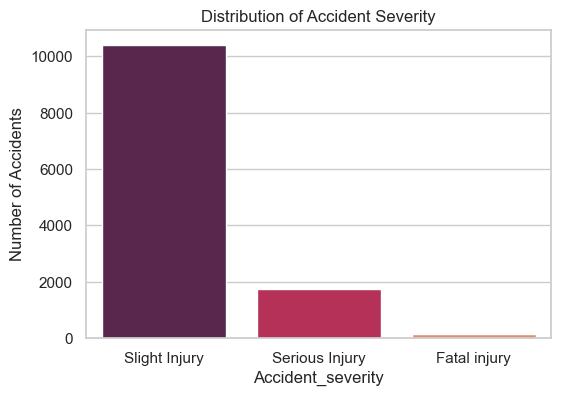

In [311]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Accident_severity', palette = 'rocket')
plt.title('Distribution of Accident Severity')
plt.ylabel('Number of Accidents')

plt.show()

<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-   The dataset exhibits a significant **class imbalance**, with **Slight Injury** accidents being the most frequent, followed by "Serious Injury "and then "Fatal Injury."

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:center;">
Time Features

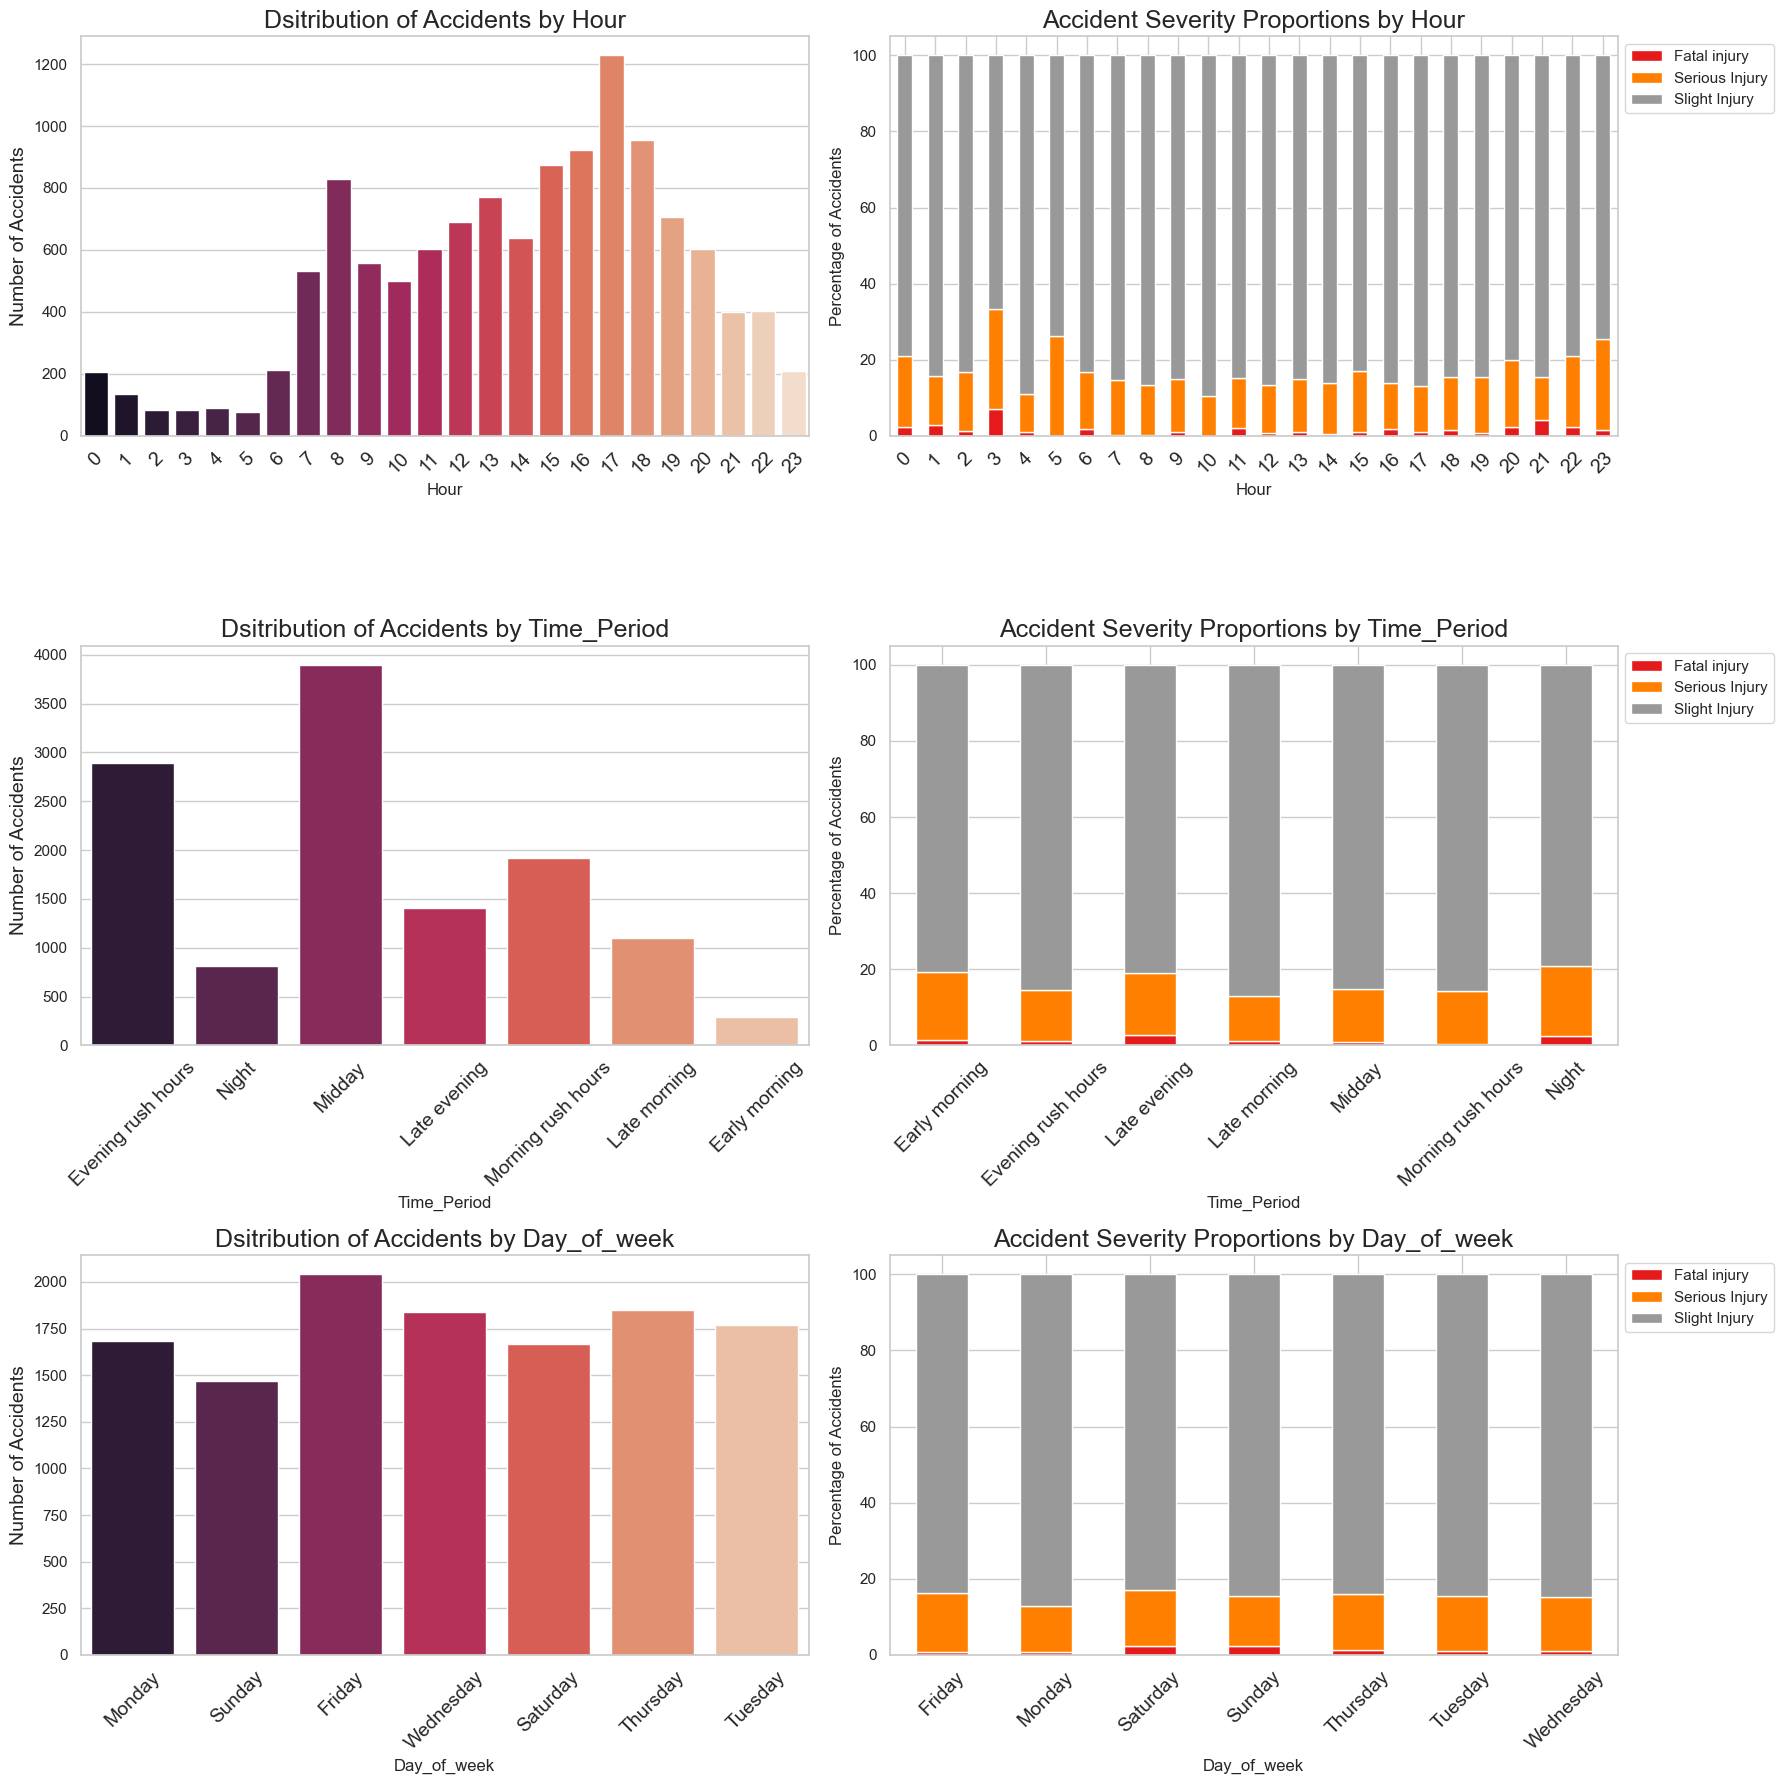

In [236]:
time_features = ["Hour", "Time_Period", "Day_of_week"]

fig, axes = plt.subplots(3, 2, figsize=(18, 18))  
for i, col in enumerate(time_features):
    sns.countplot(data=df, x=col, ax=axes[i, 0], palette="rocket") #first column of axes
    axes[i, 0].set_title(f"Dsitribution of Accidents by {col}",fontsize=18)
    axes[i, 0].set_ylabel('Number of Accidents',fontsize=14)
    axes[i, 0].tick_params(axis='x',rotation= 45,labelsize=14)
    # Calculating proportions for each category
    total_counts = df[col].value_counts()
    proportions = df.groupby(col)['Accident_severity'].value_counts(normalize=True).unstack(fill_value=0)*100  # calculate percentage
    proportions.plot(kind='bar',stacked= True, ax=axes[i, 1], colormap="Set1") #second column of axes
    axes[i, 1].set_title(f"Accident Severity Proportions by {col}",fontsize =18)
    axes[i, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[i, 1].set_ylabel('Percentage of Accidents')
    axes[i, 1].tick_params(axis='x' ,rotation=45, labelsize=14)

    
plt.tight_layout()
plt.show()


<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-  **Rush hour peaks** occur in the morning around *7AM-8 AM* and evening around *4PM-7 PM* potentially due to congestion and fatigue. 
-  A significant drop is observed during **night and early-morning hours** *(11-7 AM)*,but **night** *(11PM-5AM)* has relatively higher proportion of severe accidents.
-  **Midday** *(11 AM - 5 PM)* exhibits a surprisingly high accident frequency, exceeding even rush hour periods.Further analysis is needed to explore potential contributing factors, such as increased distractions,School hours etc.
- Fatal accidents occur more during**Late Evening**. 
- **Friday** sees the most accidents, possibly reflecting increased social activity and early departure from office before the weekend.
- **Weekends** *(Saturday & Sunday)* show  continued road usage for leisure and other activities.Higher proportion of **fatal accidents**  suggest riskier driving behaviors such as overspeeding or reduced law enforcement.

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:center;">
Driver Features

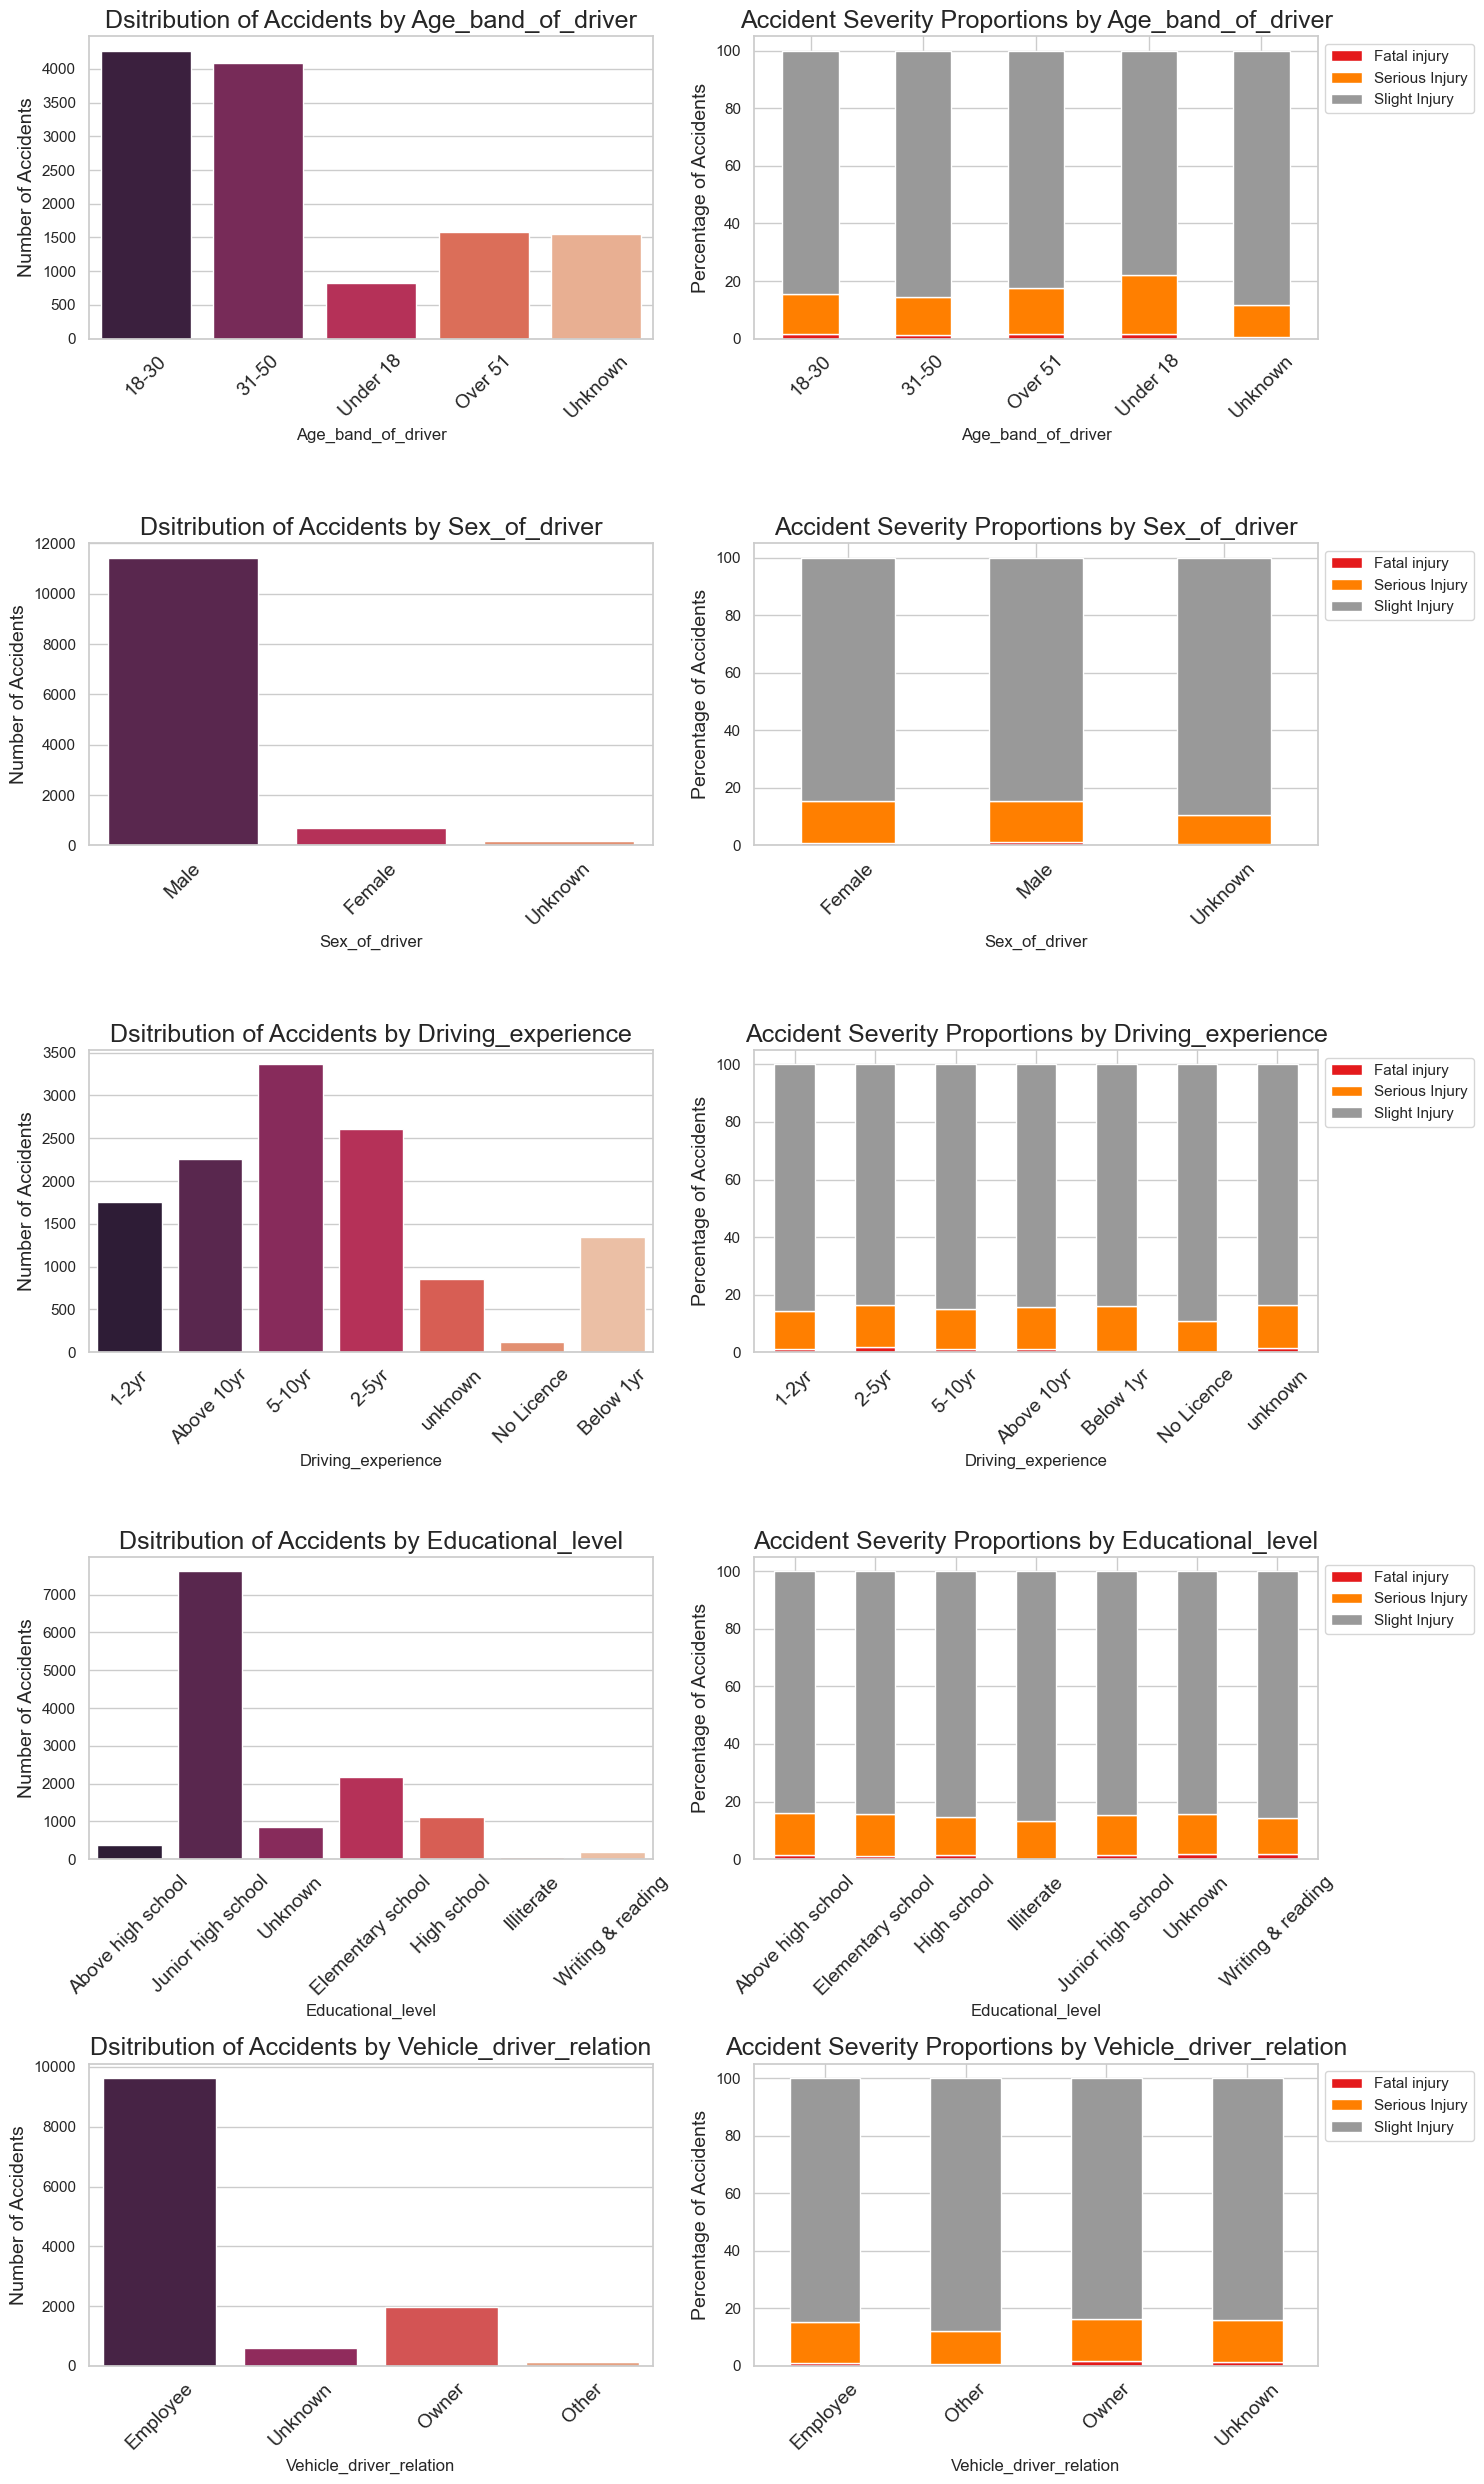

In [17]:

driver_features = ["Age_band_of_driver", "Sex_of_driver", "Driving_experience", "Educational_level", 'Vehicle_driver_relation']

fig, axes = plt.subplots(5, 2, figsize=(15,25))  
for i, col in enumerate(driver_features):
    # Count Plot
    sns.countplot(data=df, x=col, ax=axes[i, 0], palette="rocket")
    axes[i, 0].set_title(f"Dsitribution of Accidents by {col}",fontsize=18)
    axes[i, 0].set_ylabel('Number of Accidents',fontsize=14)
    axes[i, 0].tick_params(axis='x', rotation=45,labelsize=14)

    # Proportion Plot
    proportions = df.groupby(col)['Accident_severity'].value_counts(normalize=True).unstack(fill_value=0) * 100

    proportions.plot(kind='bar', stacked= True, ax=axes[i, 1], colormap="Set1")
    axes[i, 1].set_title(f"Accident Severity Proportions by {col}",fontsize=18)
    axes[i, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[i, 1].set_ylabel('Percentage of Accidents',fontsize=14)
    axes[i, 1].tick_params(axis='x', rotation=45,labelsize=14)  

plt.tight_layout()
plt.show()


<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-  The *18-30* age group experiences the **highest number of accidents**, followed closely by the *31-50* group. However, **severe accidents** are relatively higher among **under-18** and **over-51** drivers, possibly due to inexperience or slower reflexes. 
-  **Males** significantly dominate the Accident data , reflecting higher road exposure.
-  *5-10 years* of Driving experience sees the **most accidents**.However *2-5years* of Driving experience records increased severity.
-  The majority of accidents involve drivers with education upto **junior high school**
-  **Employees** (professional drivers) account for most accidents.

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:center;">
Vehicle Features

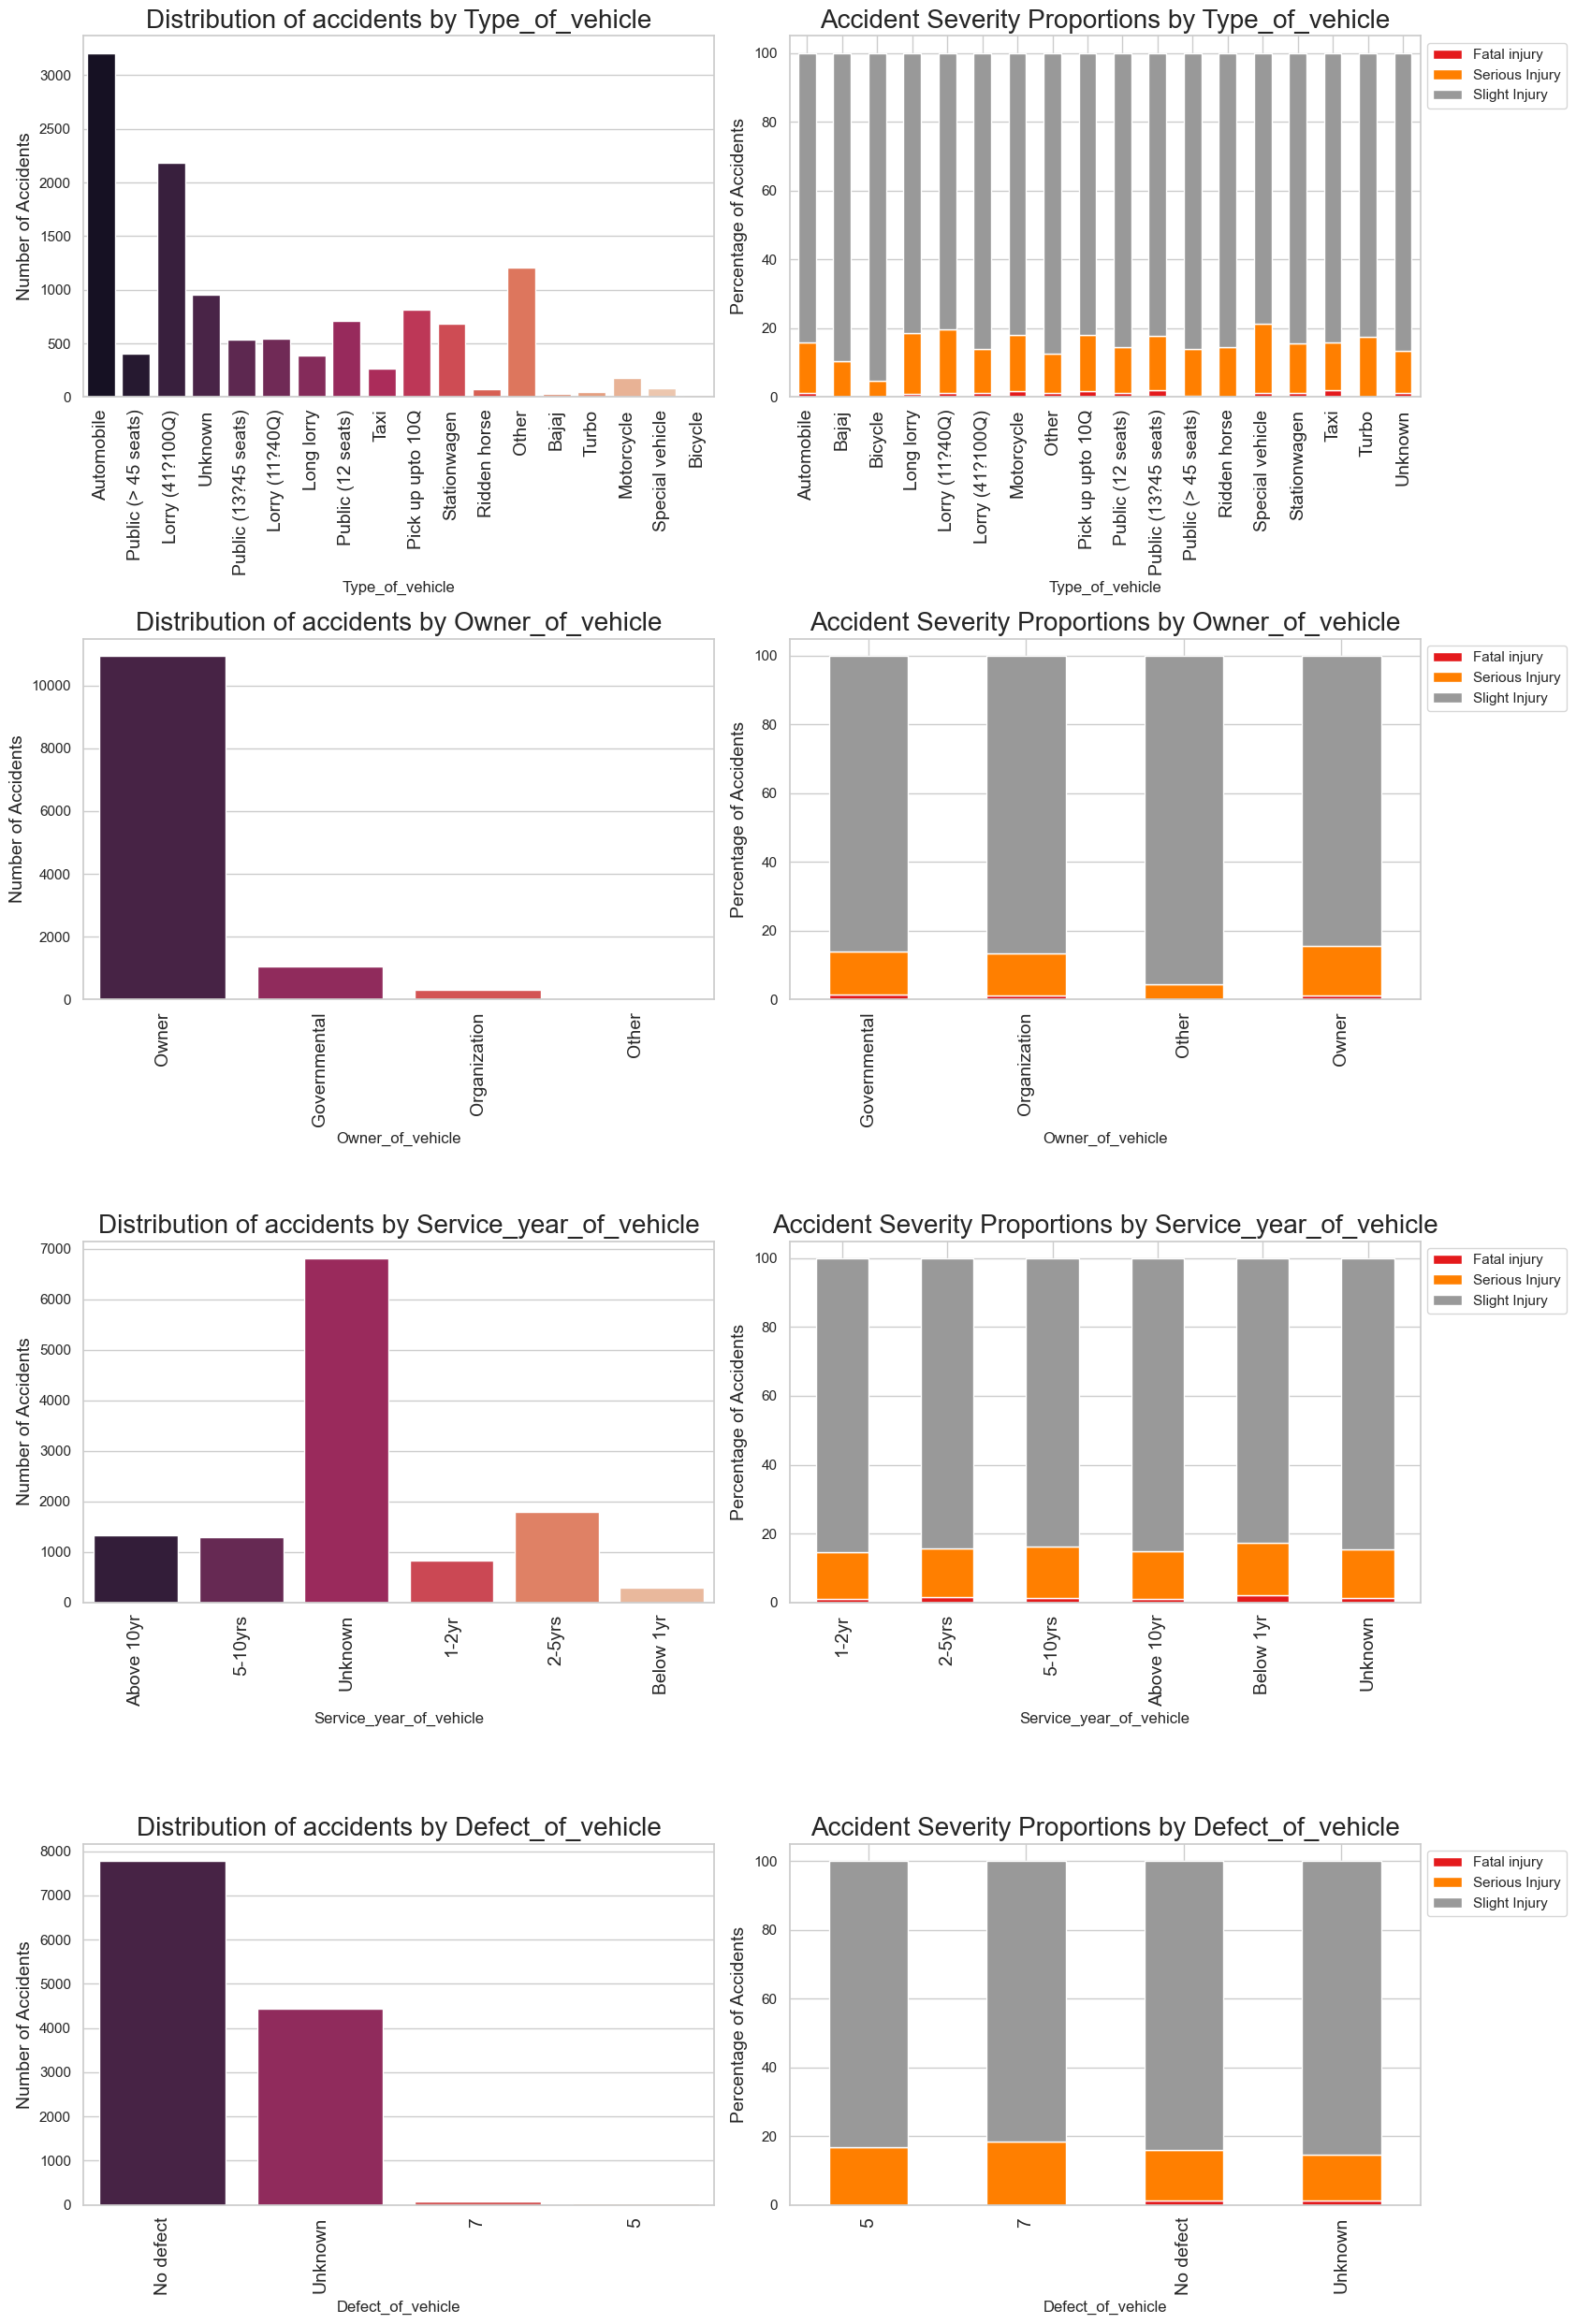

In [23]:
vehicle_features = ["Type_of_vehicle","Owner_of_vehicle","Service_year_of_vehicle","Defect_of_vehicle"]

fig, axes = plt.subplots(4, 2, figsize=(17, 25))  

for i, col in enumerate(vehicle_features):
    # Count Plot
    sns.countplot(data=df, x=col, ax=axes[i, 0], palette="rocket")
    axes[i, 0].set_title(f"Distribution of accidents by {col}",fontsize=20)
    axes[i, 0].set_ylabel('Number of Accidents',fontsize=14)
    axes[i, 0].tick_params(axis='x', rotation=90 ,labelsize=14)

    # Proportion Plot
    proportions = df.groupby(col)['Accident_severity'].value_counts(normalize=True).unstack(fill_value=0) * 100

    proportions.plot(kind='bar', stacked= True, ax=axes[i, 1], colormap="Set1")
    axes[i, 1].set_title(f"Accident Severity Proportions by {col}",fontsize=20)
    axes[i, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[i, 1].set_ylabel('Percentage of Accidents',fontsize=14)
    axes[i, 1].tick_params(axis='x', rotation=90,labelsize=14)  

plt.tight_layout()
plt.show()

plt.show()

<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-  **Automobiles**(private cars,Suv s,vans etc) contribute the highest number of accidents, followed by lorries (trucks) and public transport.
-  Lorries **(Lorry41?100Q)** account for the second most accidents  possibly due to their heavy impact force and highway involvement.
- Public vehicle **(Public 13?45)** record increased Fatal injuries.
-  **Privately owned vehicles** dominate, while government and organizational vehicles have a lower share..
- **Data Qaulity issue:** A significant portion of data for **Defect of Vehicle** and **Service Year of Vehicle** is marked as **Unknown**, which limits the ability to draw conclusive insights ,making them unreliable for further analysists.Hence, these features should be **excluded** from further modeling.

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:center;">
    Area of Accident

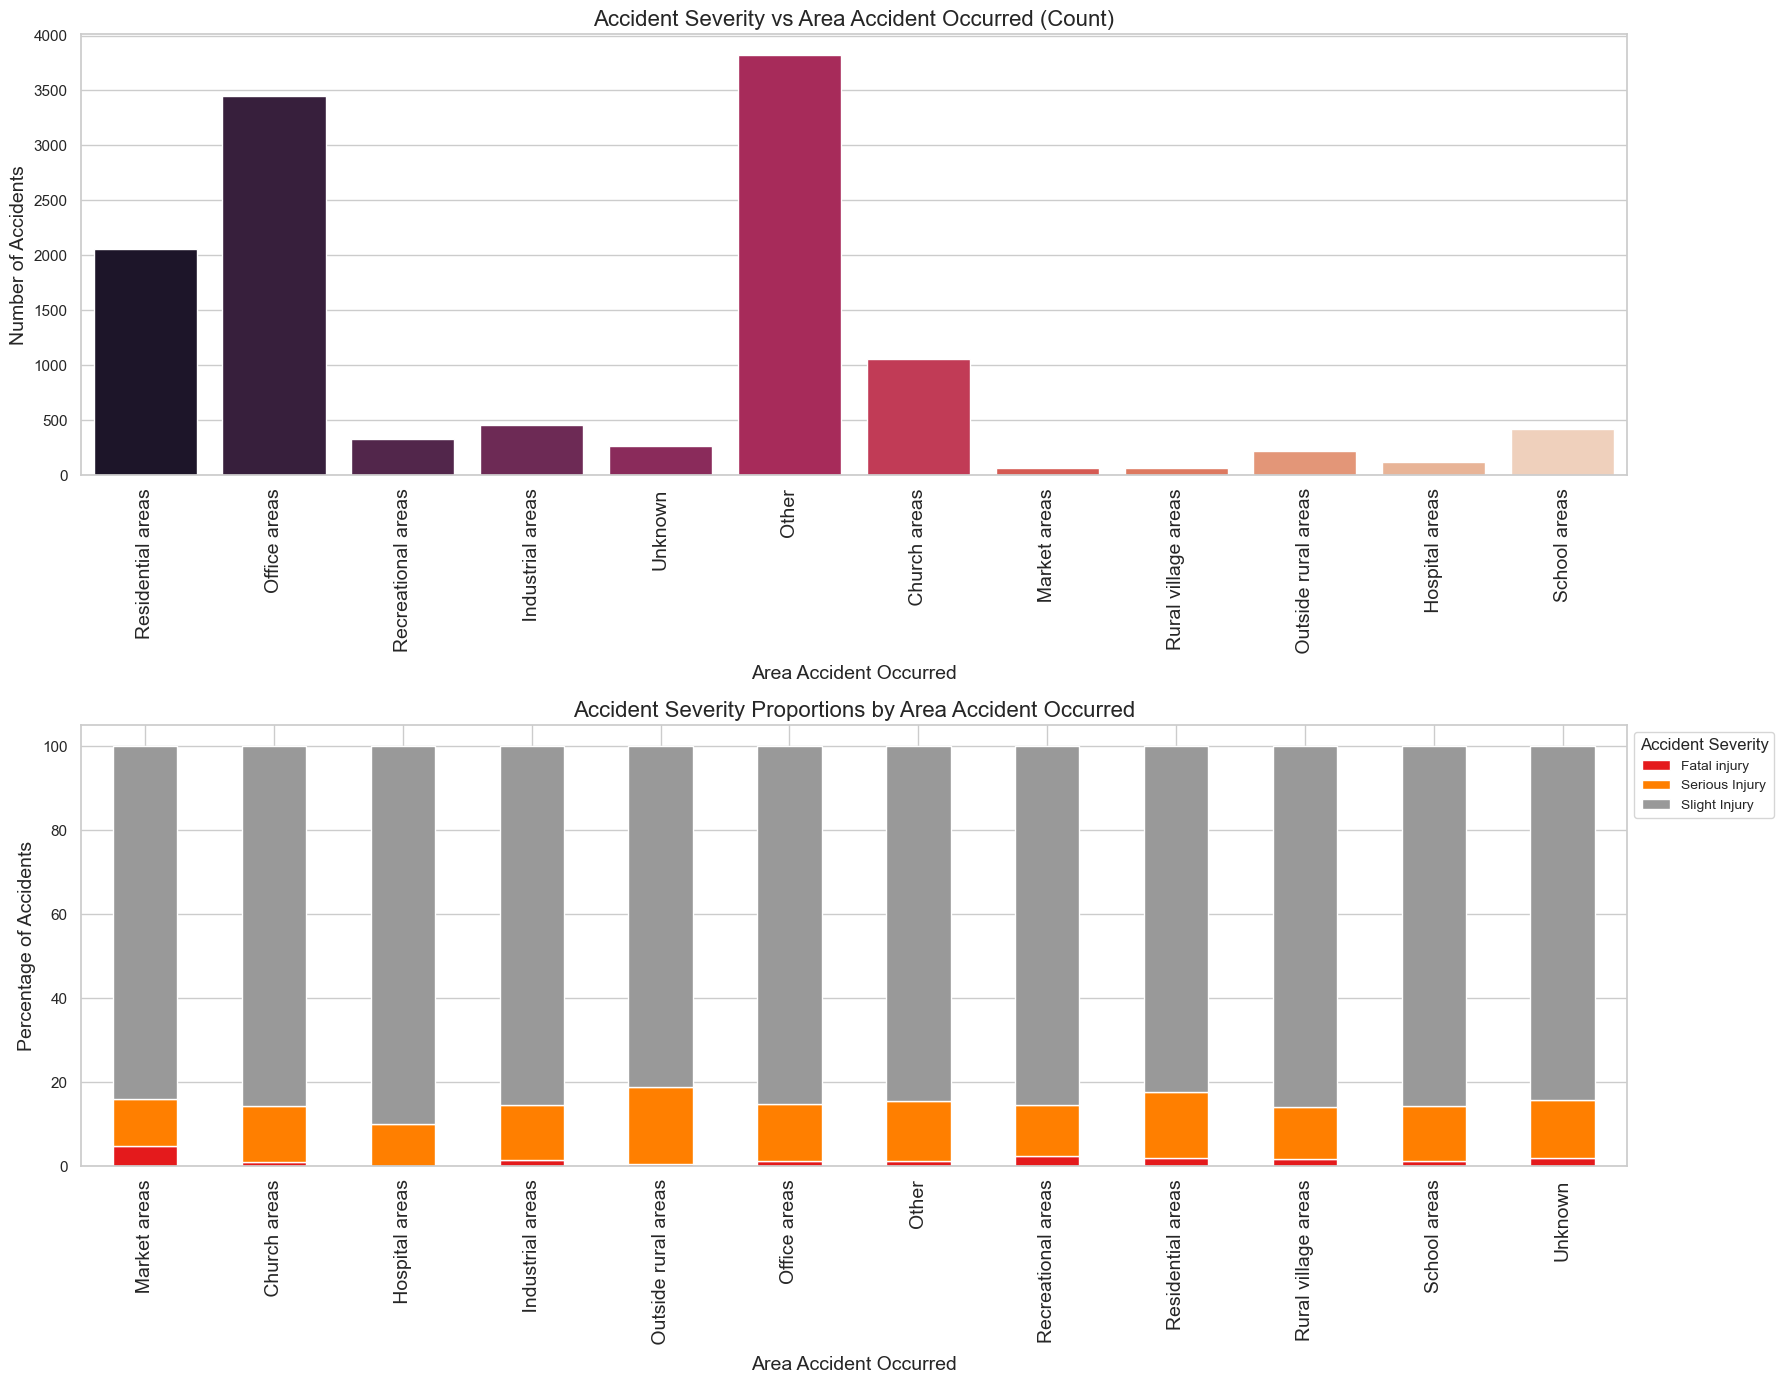

In [40]:
#Area Accident occured
plt.figure(figsize=(18,14)) 
ax1 = plt.subplot(2, 1, 1)
sns.countplot(data=df, x="Area_accident_occured",palette='rocket', ax=ax1)
ax1.set_title('Accident Severity vs Area Accident Occurred (Count)', fontsize=16)
ax1.set_ylabel('Number of Accidents', fontsize=14)
ax1.set_xlabel('Area Accident Occurred', fontsize=14)
ax1.tick_params(axis='x', rotation=90, labelsize=14)

ax2 = plt.subplot(2, 1, 2)
proportions = df.groupby("Area_accident_occured")['Accident_severity'].value_counts(normalize=True).unstack(fill_value=0) * 100
proportions.plot(kind='bar', stacked=True, ax=ax2, colormap="Set1")
ax2.set_title('Accident Severity Proportions by Area Accident Occurred', fontsize=16)
ax2.set_ylabel('Percentage of Accidents', fontsize=14)
ax2.set_xlabel('Area Accident Occurred', fontsize=14)
ax2.legend(title="Accident Severity", loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
ax2.tick_params(axis='x', rotation=90, labelsize=14)


plt.tight_layout()  
plt.show()


<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-  A significant portion of accidents occurred in areas labeled as **Other**, limiting deeper insights. More granular categorization in future datasets could provide clearer patterns.
- **Office areas** and **residential areas** show high accident frequencies, likely due to heavy traffic and mixed road users.
- **Market areas** exhibit a high rate of fatal accidents, indicating a significantly elevated risk per accident compared to other locations.



<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:center;">
Road Features

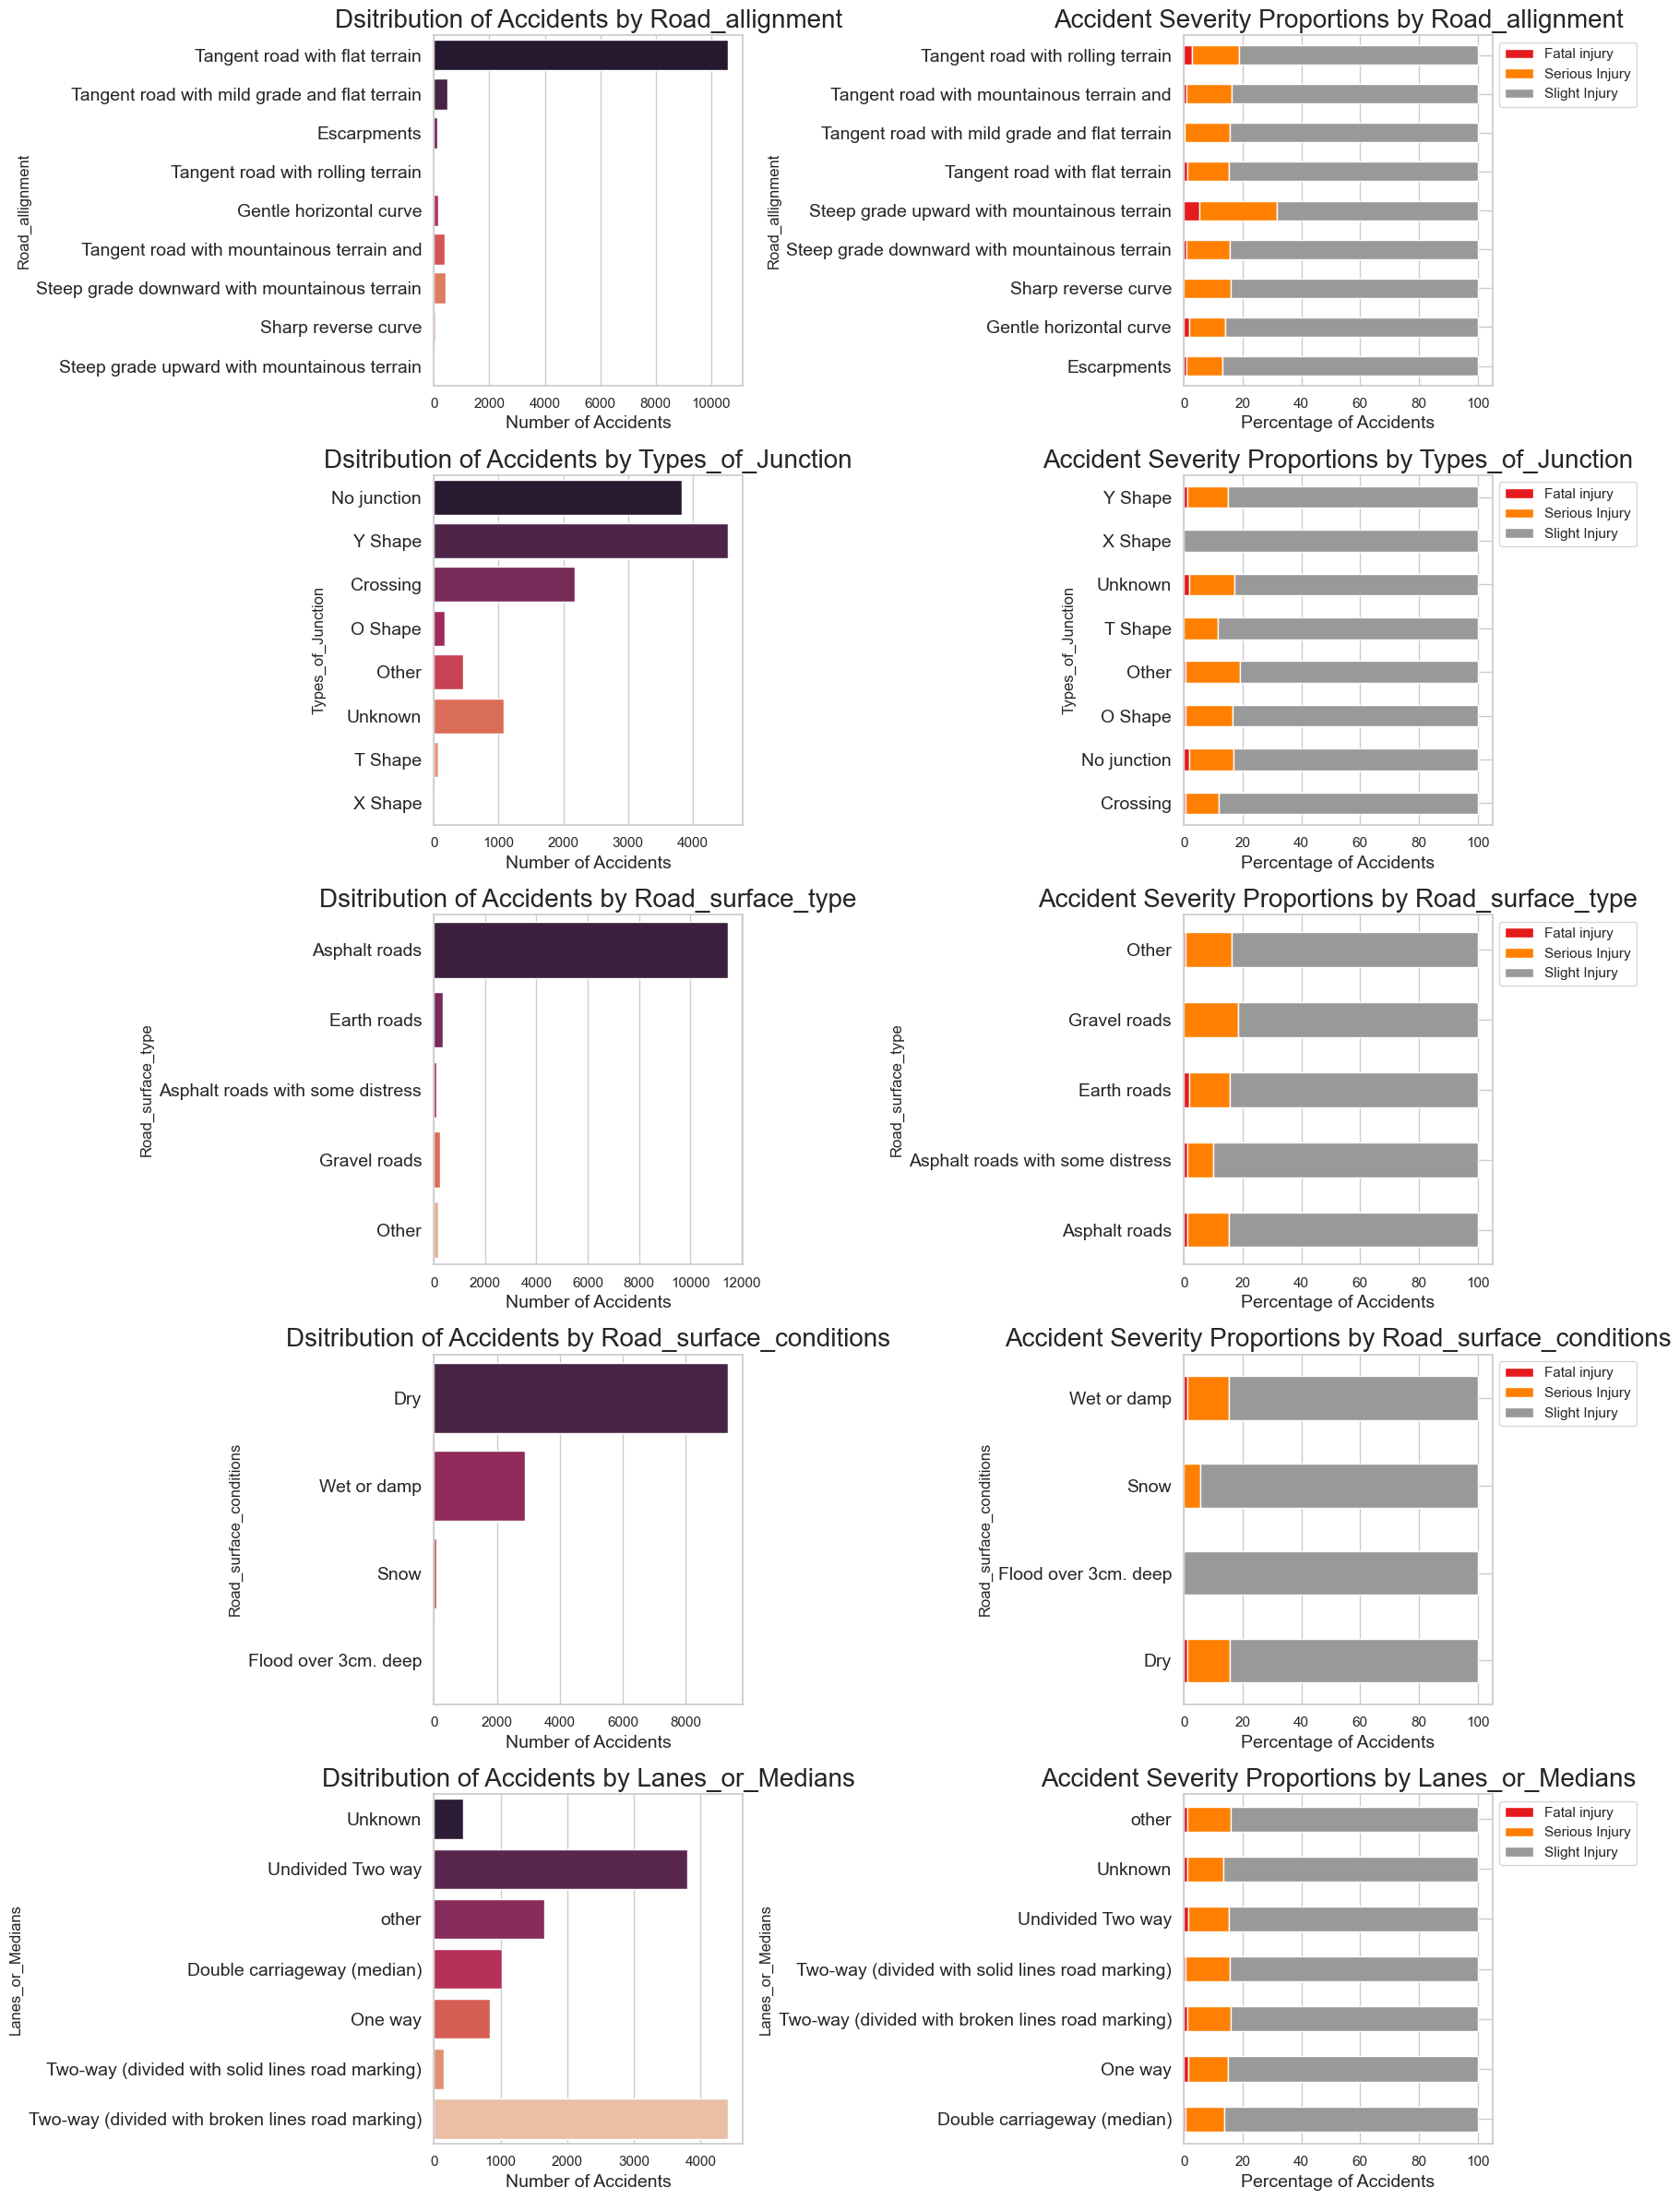

In [21]:
road_features = [ "Road_allignment", "Types_of_Junction", "Road_surface_type","Road_surface_conditions",
                 "Lanes_or_Medians"]


fig, axes = plt.subplots(5, 2, figsize=(18,24))  
for i, col in enumerate(road_features):
    # Count Plot
    sns.countplot(data=df, y=col, ax=axes[i, 0], palette="rocket")
    axes[i, 0].set_title(f"Dsitribution of Accidents by {col}",fontsize=20)
    axes[i, 0].set_xlabel('Number of Accidents',fontsize=14)
    axes[i, 0].tick_params(axis='y', rotation=0,labelsize=14)

    # Proportion Plot
    proportions = df.groupby(col)['Accident_severity'].value_counts(normalize=True).unstack(fill_value=0) * 100

    proportions.plot(kind='barh', stacked = True, ax=axes[i, 1], colormap="Set1")
    axes[i, 1].set_title(f"Accident Severity Proportions by {col}",fontsize=20)
    axes[i, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[i, 1].set_xlabel('Percentage of Accidents',fontsize=14)
    axes[i, 1].tick_params(axis='y', rotation=0,labelsize=14)  

plt.tight_layout()
plt.show()


<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-   **Tangent roads with flat terrain** have the highest accident count,suggesting effect of other factors even in seemingly safe road alignments.
-  **Y shape junctions** appear to have a higher accident frequency. This might be due to the complexity of merging traffic flows and potential visibility issues.
-  **Asphalt roads** have the most accidents, likely due to their prevalence.However accidents are more severe on **Earth roads** and **Gravel roads**  
- **Dry** road surface conditions correlate with the highest accident frequency.
- **Two-way roads with broken line dividers** and **Undivided Two way road** exhibit higher accident frequency.This underscores the urgent need for implementing lane separation to improve road safety. 

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:center;">
Collision and Movement

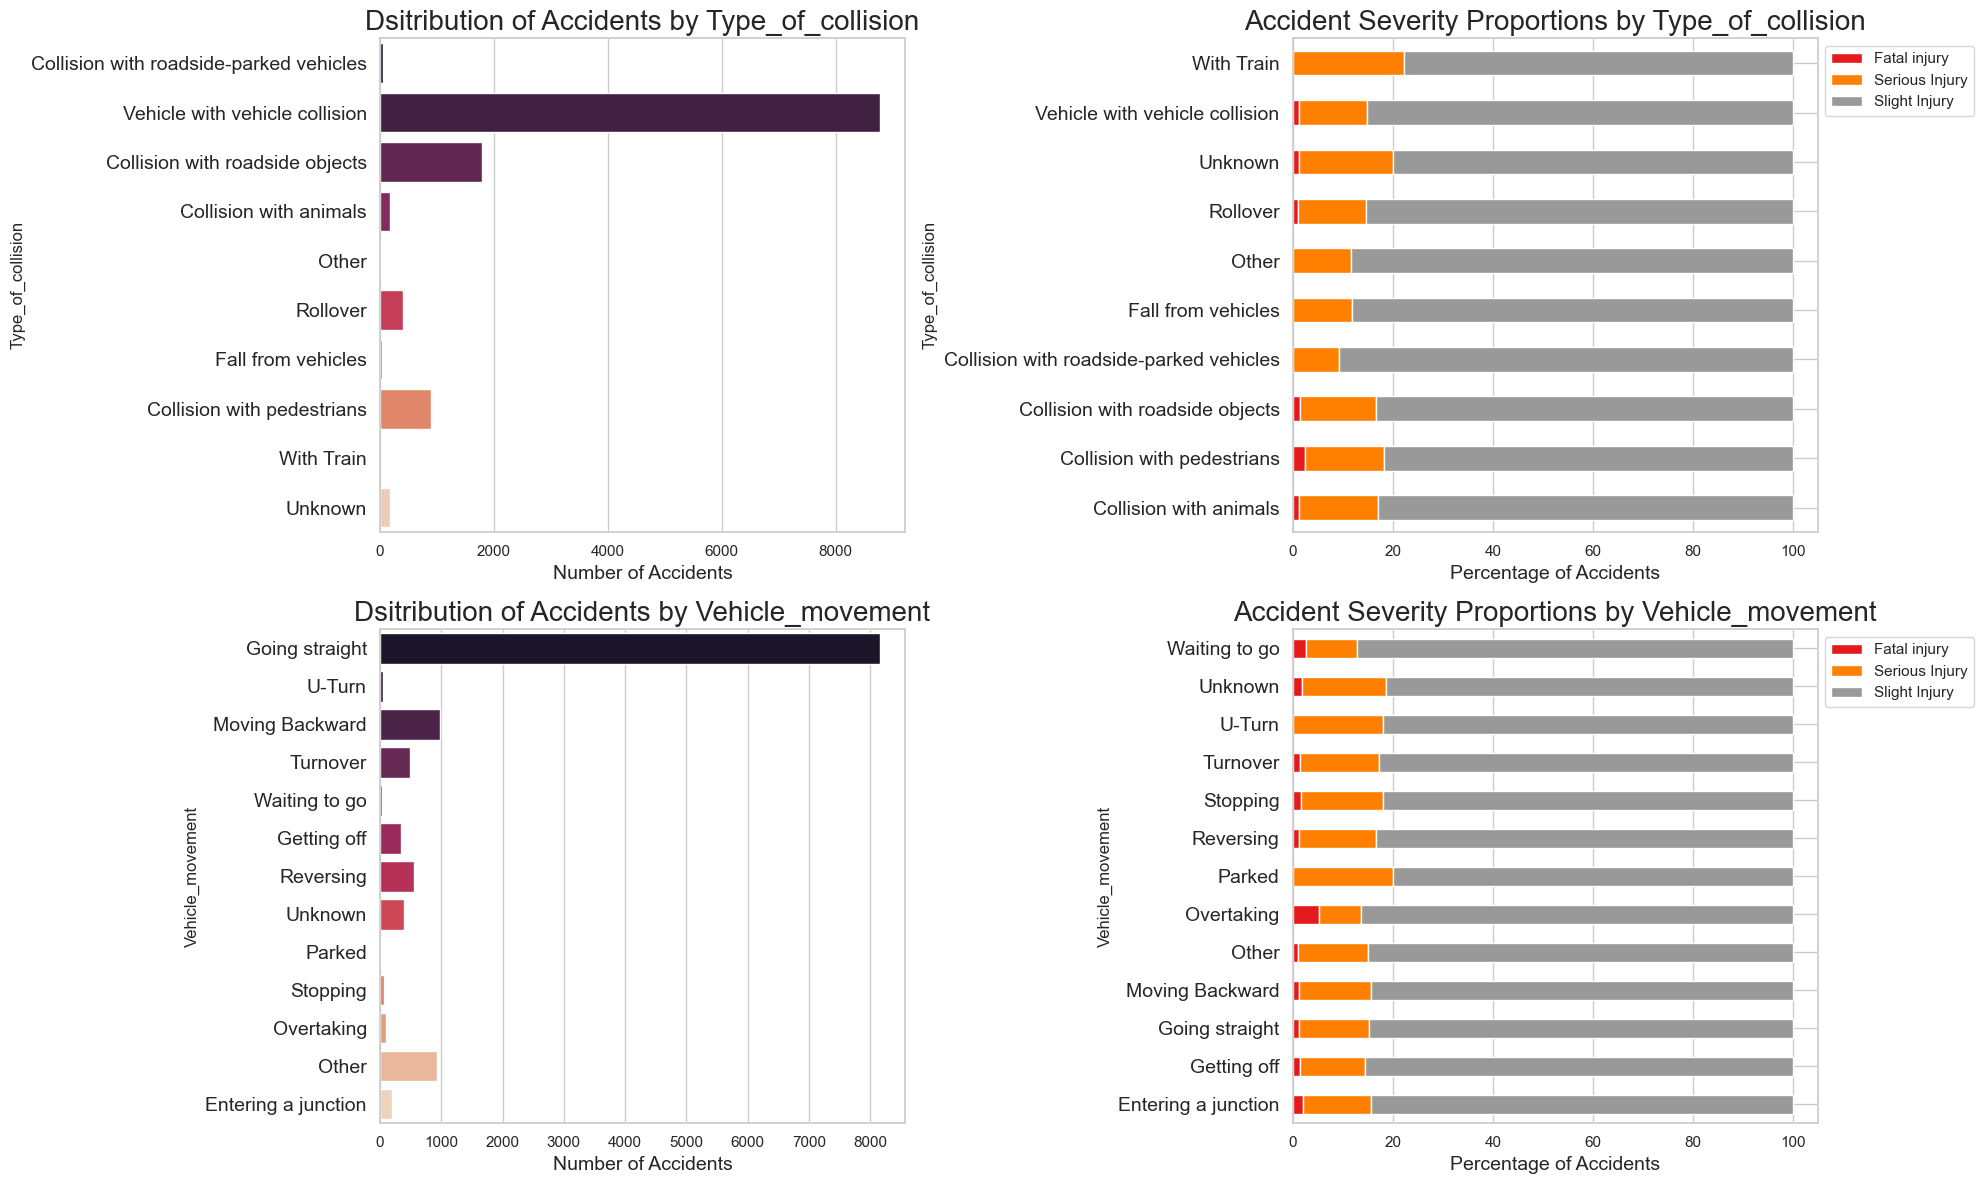

In [43]:
collision_and_movement_features = ["Type_of_collision","Vehicle_movement"]


fig, axes = plt.subplots(2, 2, figsize=(20,12))
for i, col in enumerate(collision_and_movement_features):
    # Count Plot
    sns.countplot(data=df, y=col, ax=axes[i, 0], palette="rocket")
    axes[i, 0].set_title(f"Dsitribution of Accidents by {col}",fontsize=20)
    axes[i, 0].set_xlabel('Number of Accidents',fontsize=14)
    axes[i, 0].tick_params(axis='y', rotation=0,labelsize=14)

    # Proportion Plot
    proportions = df.groupby(col)['Accident_severity'].value_counts(normalize=True).unstack(fill_value=0) * 100

    proportions.plot(kind='barh', stacked = True, ax=axes[i, 1], colormap="Set1")
    axes[i, 1].set_title(f"Accident Severity Proportions by {col}",fontsize=20)
    axes[i, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[i, 1].set_xlabel('Percentage of Accidents',fontsize=14)
    axes[i, 1].tick_params(axis='y', rotation=0,labelsize=14)  

plt.tight_layout()
plt.show()

<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-   **Vehicle with vehicle collision** accounts for the highest accident count, highlighting risks in dense traffic conditions.
-  **Pedestrian collisions**, though less frequent, have a higher proportion of fatal injuries, highlighting the vulnerability of these road users.
-  **Going straight** is the most common vehicle movement preceding accidents.


<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:center;">
Casualty Features

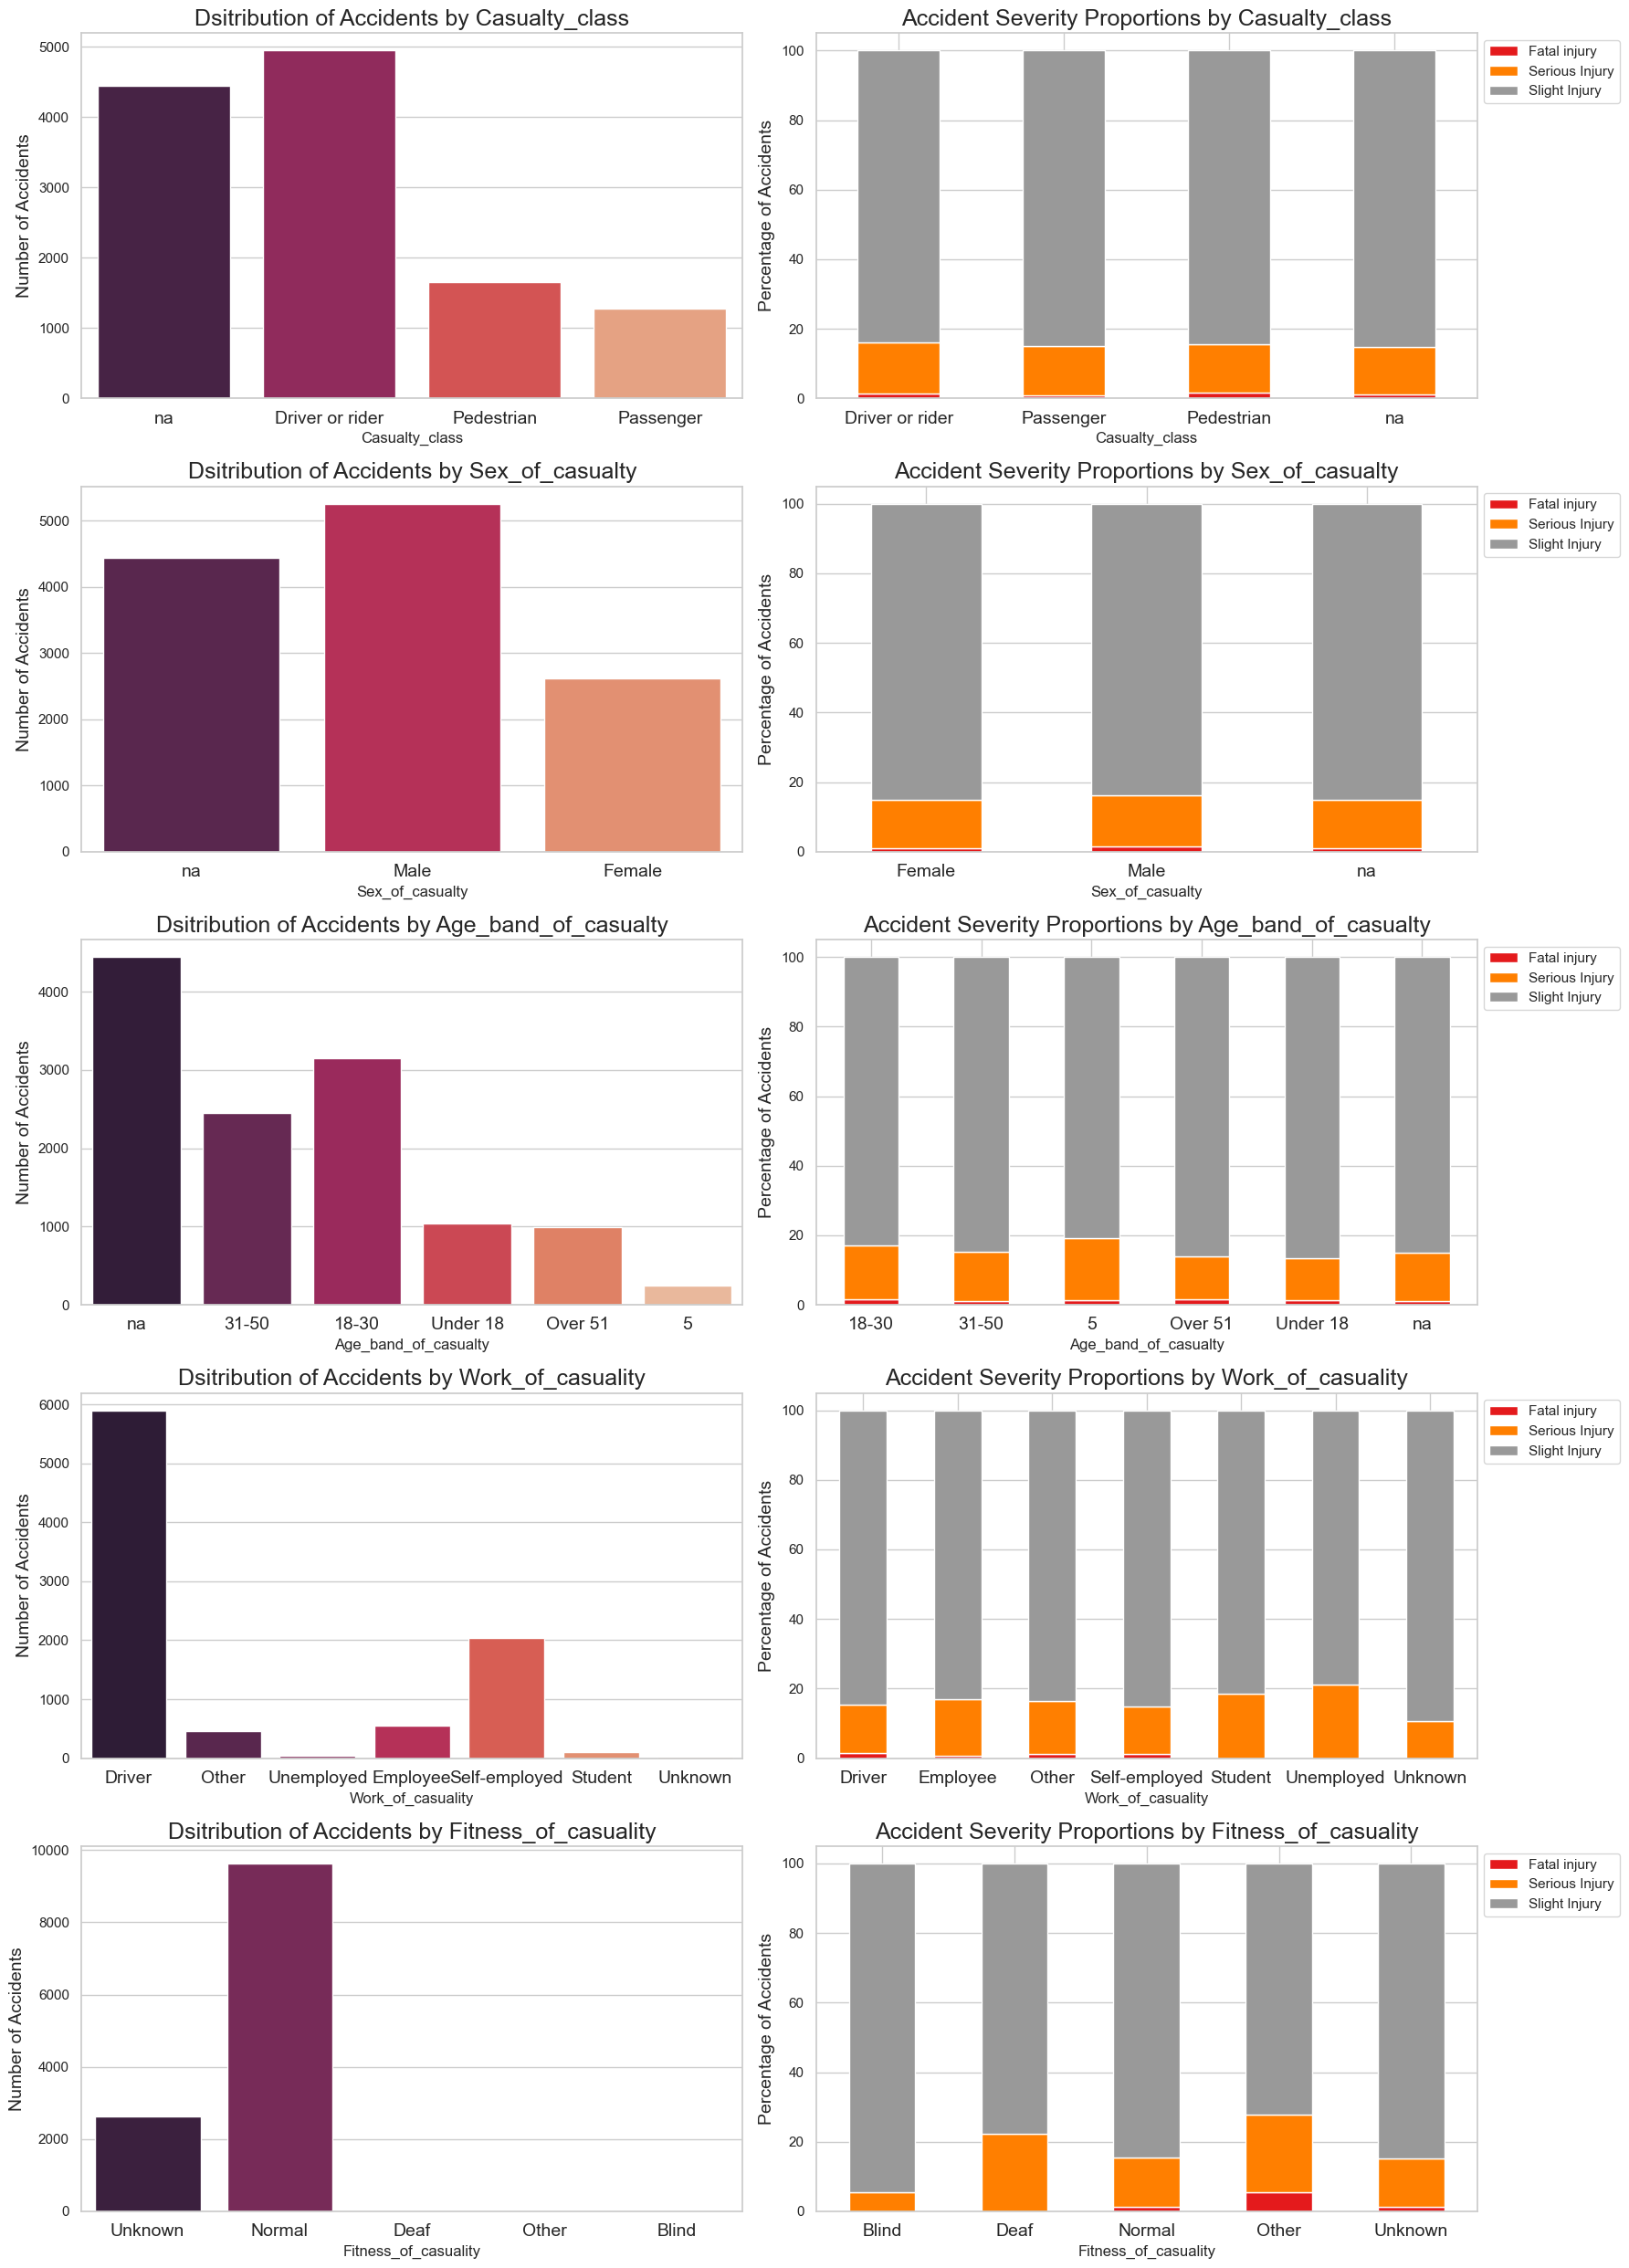

In [268]:
casualty_features = ["Casualty_class","Sex_of_casualty","Age_band_of_casualty","Work_of_casuality","Fitness_of_casuality"]



fig, axes = plt.subplots(5, 2, figsize=(18,25))
for i, col in enumerate(casualty_features):
    # Count Plot
    sns.countplot(data=df, x=col, ax=axes[i, 0], palette="rocket")
    axes[i, 0].set_title(f"Dsitribution of Accidents by {col}",fontsize=18)
    axes[i, 0].set_ylabel('Number of Accidents',fontsize=14)
    axes[i, 0].tick_params(axis='x', rotation=0,labelsize=14)

    # Proportion Plot
    proportions = df.groupby(col)['Accident_severity'].value_counts(normalize=True).unstack(fill_value=0) * 100

    proportions.plot(kind='bar', stacked= True, ax=axes[i, 1], colormap="Set1")
    axes[i, 1].set_title(f"Accident Severity Proportions by {col}",fontsize=18)
    axes[i, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[i, 1].set_ylabel('Percentage of Accidents',fontsize=14)
    axes[i, 1].tick_params(axis='x', rotation=0,labelsize=14) 

plt.tight_layout()
plt.show()




<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-   **Drivers or riders** experience the highest number of accidents, followed by pedestrians.
-  Among known casualties, **males** are significantly present. However, the large **na**(not available) category for sex makes it impossible to draw definitive conclusions
-  Dominance of**na** caegory in 'Age band of casuality' hinders any definitive conclusion.However age groups of **18-30** and **31-50** experience the highest casualty counts.  
- **Driver** emerges as a prominent category in 'Work of Casuality' column.
- Most casualties are classified as **Normal** in fitness, followed by **Unknown** meaning physical impairment is not a major contributing factor as of now. 

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:center;">
Cause of Accident and Pedestrian Movement

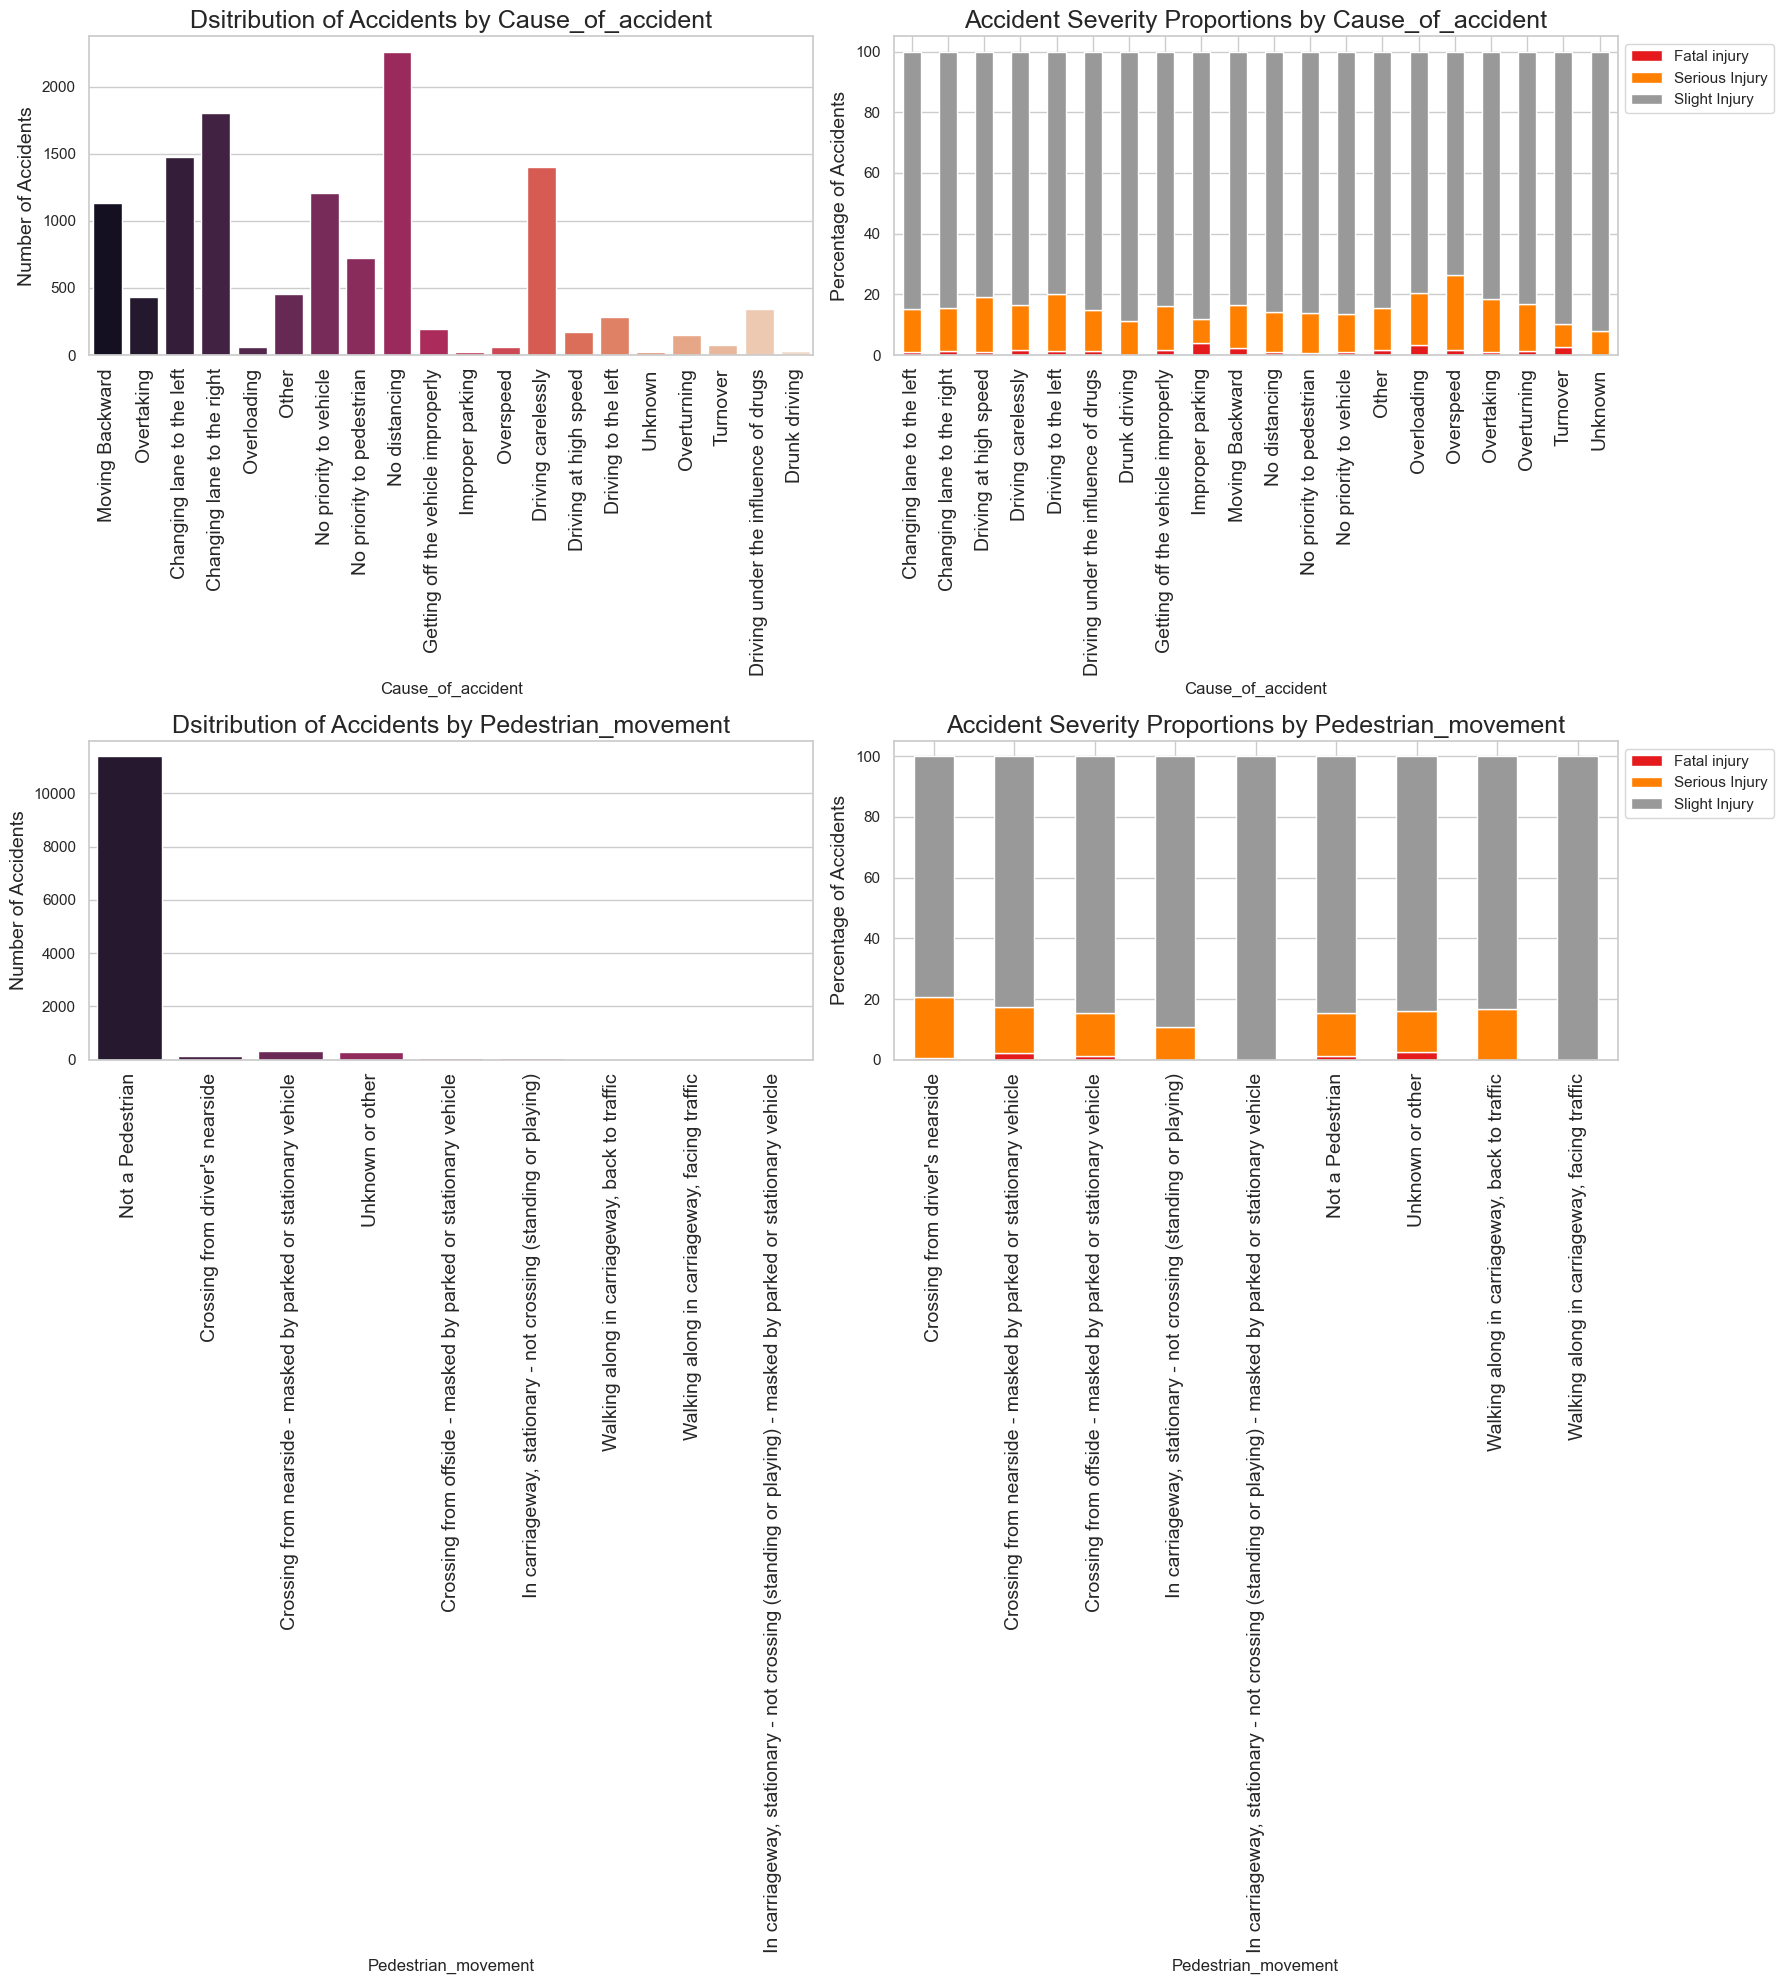

In [275]:
cause_and_pedestrian = ["Cause_of_accident", "Pedestrian_movement"]

fig, axes = plt.subplots(2, 2, figsize=(18,20))
for i, col in enumerate(cause_and_pedestrian):
    # Count Plot
    sns.countplot(data=df, x=col, ax=axes[i, 0], palette="rocket")
    axes[i, 0].set_title(f"Dsitribution of Accidents by {col}",fontsize=18)
    axes[i, 0].set_ylabel('Number of Accidents',fontsize=14)
    axes[i, 0].tick_params(axis='x', rotation=90,labelsize=14)

    # Proportion Plot
    proportions = df.groupby(col)['Accident_severity'].value_counts(normalize=True).unstack(fill_value=0) * 100

    proportions.plot(kind='bar', stacked = True, ax=axes[i, 1], colormap="Set1")
    axes[i, 1].set_title(f"Accident Severity Proportions by {col}",fontsize=18)
    axes[i, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[i, 1].set_ylabel('Percentage of Accidents',fontsize=14)
    axes[i, 1].tick_params(axis='x', rotation=90,labelsize=14)  

plt.tight_layout()
plt.show()

<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-   **No Distancing** emerges as prominent cause of accident,suggesting high traffic density.
-  **Changing the lane to left/right** are also major causes ,highlighting the urgent need for effective lane markings
- Accidents are heavily attributed to driver-related factors. 
- **Driver** emerges as a prominent category in 'Work of Casuality' column.
- Most of the accidents didnt involve Pedestrians,but among the cases involving the Pedestrians ,**crossing movements** are significant suggesting a need for pedestrian safety interventions.

<div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:120%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 3px;
        font-size:120%;
          text-align:center;">
External Features

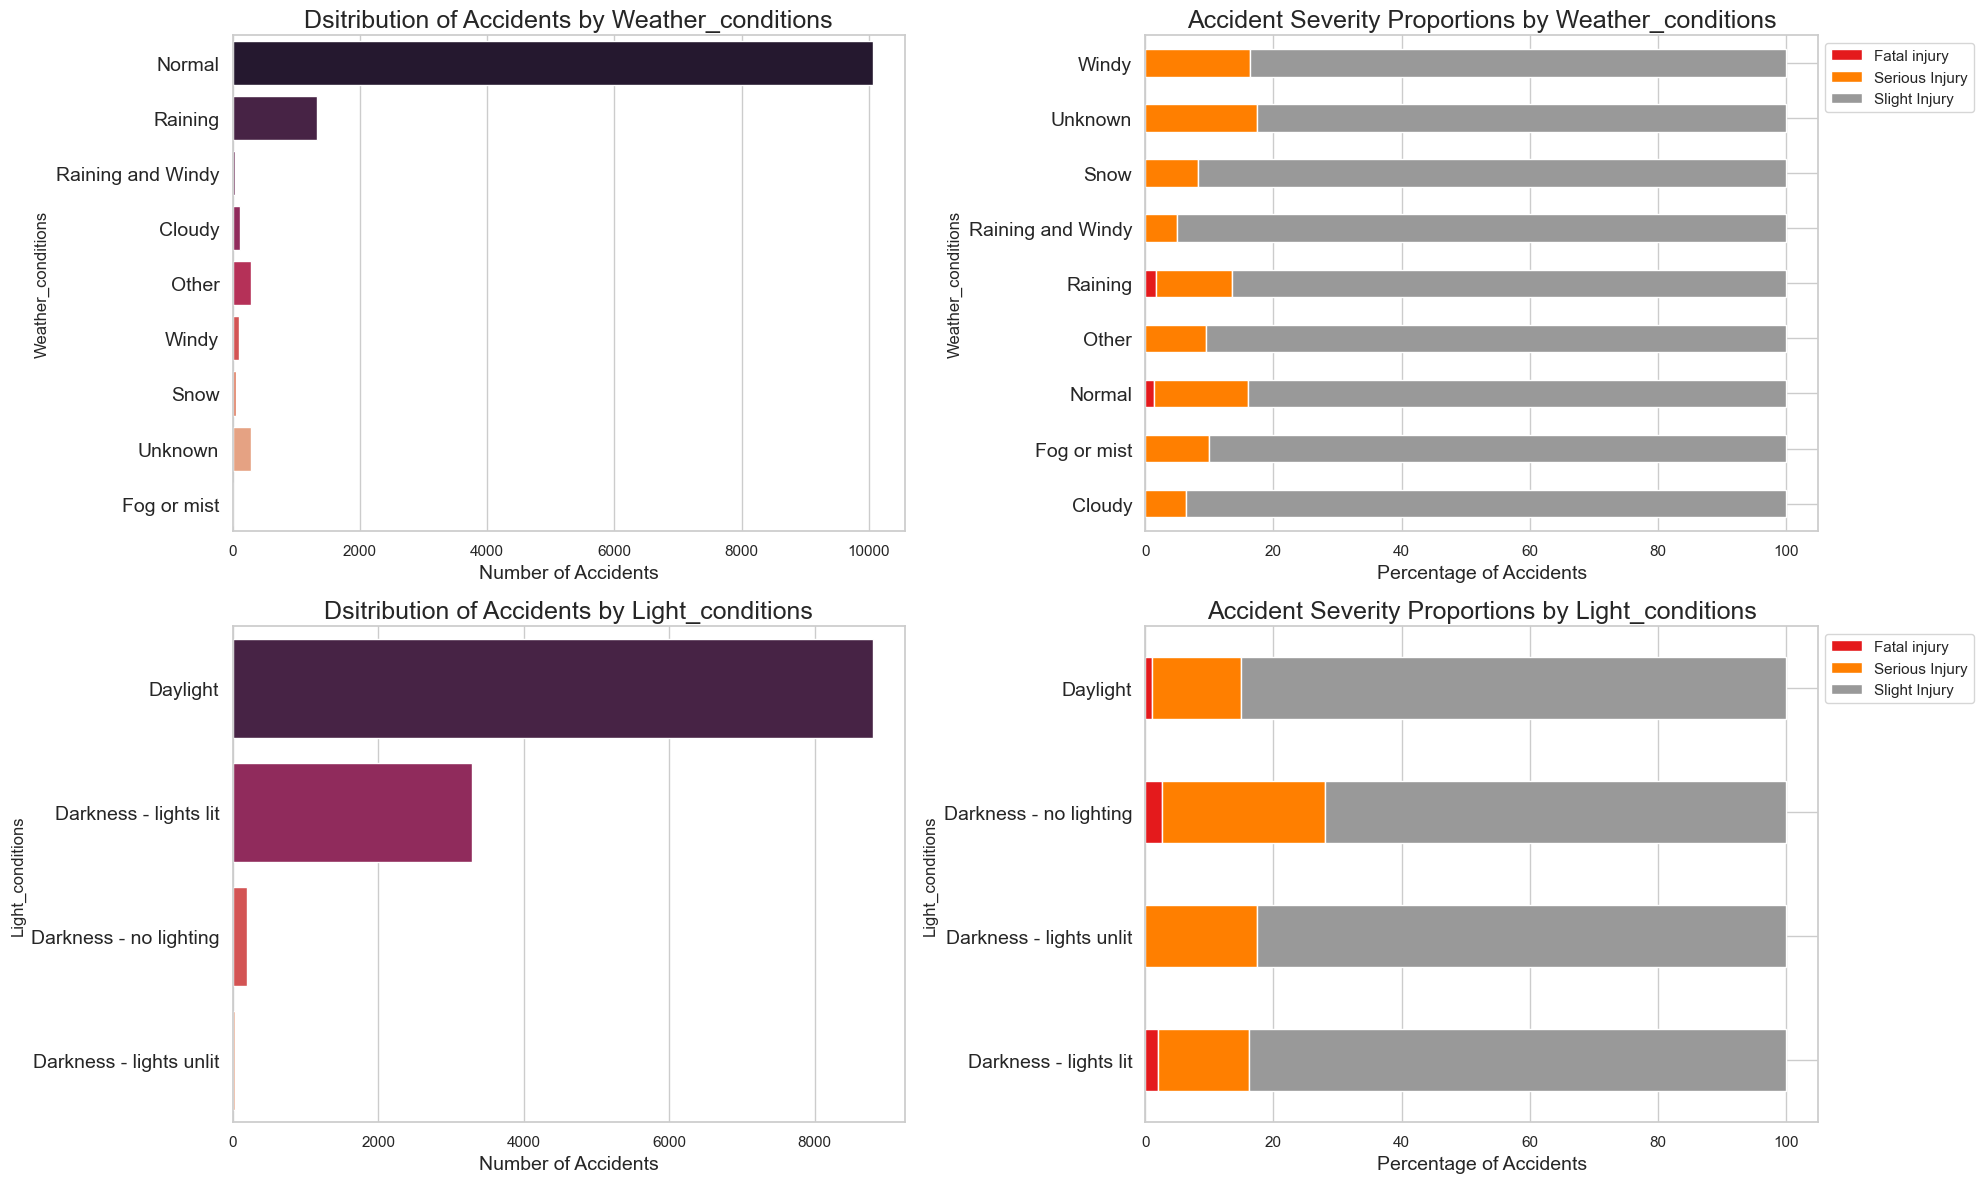

In [276]:
external_features =["Weather_conditions", "Light_conditions"]
fig, axes = plt.subplots(2, 2, figsize=(20,12))
for i, col in enumerate(external_features):
    # Count Plot
    sns.countplot(data=df, y=col, ax=axes[i, 0], palette="rocket")
    axes[i, 0].set_title(f"Dsitribution of Accidents by {col}",fontsize=18)
    axes[i, 0].set_xlabel('Number of Accidents',fontsize=14)
    axes[i, 0].tick_params(axis='y', rotation=0,labelsize=14)

    # Proportion Plot
    proportions = df.groupby(col)['Accident_severity'].value_counts(normalize=True).unstack(fill_value=0) * 100

    proportions.plot(kind='barh', stacked = True, ax=axes[i, 1], colormap="Set1")
    axes[i, 1].set_title(f"Accident Severity Proportions by {col}",fontsize=18)
    axes[i, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[i, 1].set_xlabel('Percentage of Accidents',fontsize=14)
    axes[i, 1].tick_params(axis='y', rotation=0,labelsize=14)  

plt.tight_layout()
plt.show()

<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-   Majority of accidents occur under **normal** weather conditions followed by **rainy weather**.
-   Accidents are most frequent in **daylight**, likely due to higher traffic volume during the day.
-   Accidents in **darkness with no lighting** are more severe.

 <div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
Numerical Feature Analysis

Numerical variables such as the number of vehicles involved and casualties provide quantitative insights into accident severity. We  will analyze their distributions, relationships, and variations across different severity levels.

In [44]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


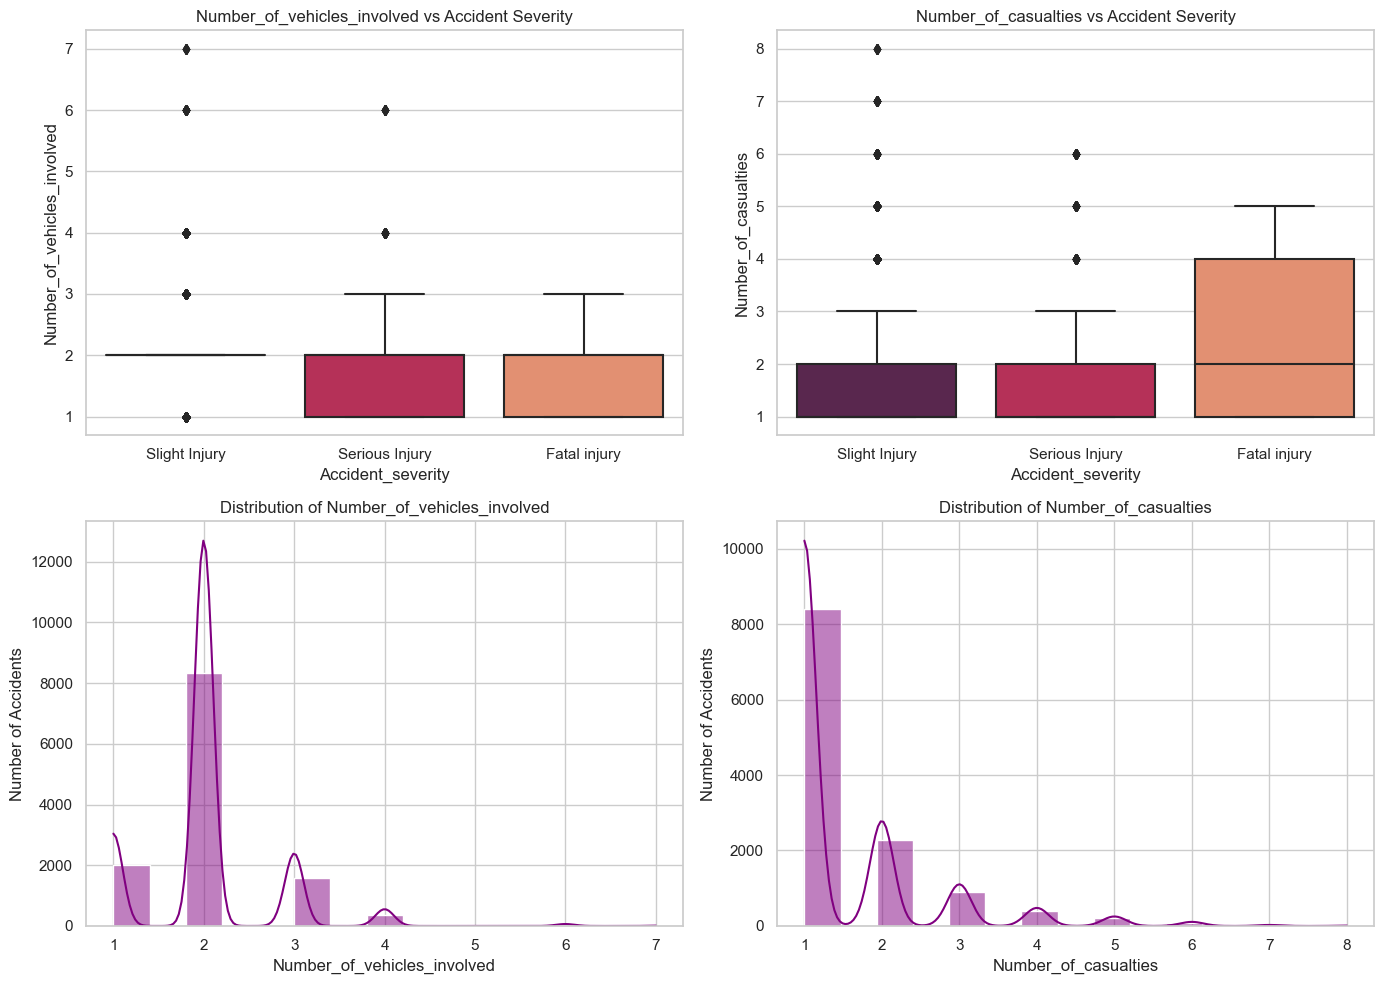

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

num_features = ["Number_of_vehicles_involved", "Number_of_casualties"]

# Boxplots
for i, col in enumerate(num_features):
    sns.boxplot(data=df, y=col, x="Accident_severity", palette="rocket", ax=axes[0, i])
    axes[0, i].set_title(f"{col} vs Accident Severity")

# Histograms
for i, col in enumerate(num_features):
    sns.histplot(df[col], bins=15, kde=True, ax=axes[1, i], color="purple")
    axes[1, i].set_title(f"Distribution of {col}")
    axes[1, i].set_ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-   
-  Accidents predominantly involve **1 to 2 vehicles**, with fewer cases involving upto 7 vehicles.
- Accidents typically involve a small number of casualties (1 or 2).
- **Fatal injuries** correspond to a higher number of casualties, with a noticeable increase in median values compared to slight and serious injuries.
- Both distributions are heavily skewed towards 1 and 2, confirming that most accidents involve few vehicles and few casualties.

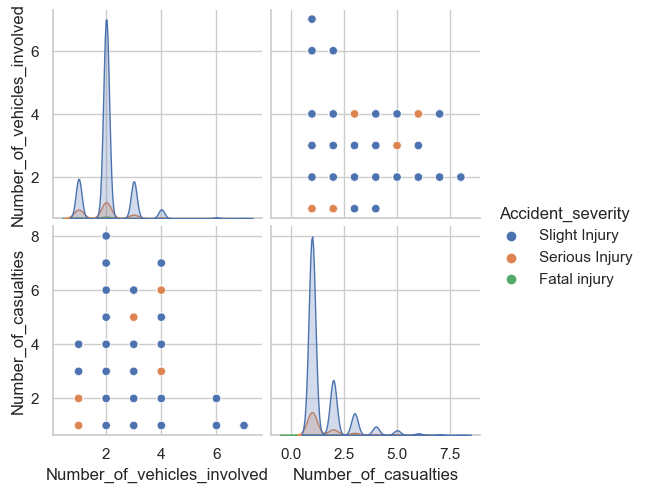

In [250]:
sns.pairplot(df,hue='Accident_severity')

<div style="color:black;
           display:fill;
           border-radius:3px;
           background-color: #f5eef8;
           font-size:100%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 5px;
          border-style: solid;
        border-width: 2px;
        font-size:120%;
          text-align:left;"

 **OBSERVATION:**
-   
-  A weak positive correlation exists between the number of vehicles involved and the number of casualties.


<div style="color:black;
           display:fill;
           background-color: #ebdef0;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 23px;
          background-color:#ebdef0;
        font-size:140%;
          text-align:center;"
   
 **Key Insights for Policymakers**

<style>
h1 { text-align: center; font-size: 24px; font-weight: bold; color: #2c3e50; }
h2 { font-size: 20px; font-weight: bold; color: #34495e; border-bottom: 2px solid #ddd; padding-bottom: 5px; }
ul { margin-left: 20px; }
li { margin-bottom: 8px; line-height: 1.6; }
strong { color: #e74c3c; }
</style>


## Managing Peak-Hour & Midday Crashes
- **Accidents peak** during **rush hours (7-8 AM, 4-7 PM)** and **midday (11 AM - 5 PM)** due to congestion, distractions, and school/work activities.  
- **Actionable Measures:** Smart traffic control, staggered work/school timings, and stricter enforcement against distracted driving.  

## Reducing Nighttime Fatalities
- **Fatal accidents increase significantly between 11 PM - 5 AM**, despite lower traffic volume.  
- **Actionable Measures:** Enhanced street lighting, increased police patrols, speed & DUI checkpoints, and improved visibility for road users.  

## Improving Safety for Young & Inexperienced Drivers
- The **18-30 age group** experiences the most accidents, while **under-18 and over-50** drivers face higher severity risks.  
- **Actionable Measures:** Implementing graduated licensing programs, defensive driving courses, and periodic skill assessments for senior drivers.  

## Addressing Risks from Heavy Vehicles & Public Transport
- **Lorries and public transport** contribute to a high number of **fatal accidents**.  
- **Actionable Measures:** Stricter vehicle maintenance checks, fatigue monitoring for commercial drivers, and designated truck lanes on highways.  

## Enhancing Safety in Market & Residential Areas
- **Market areas** report more **fatal accidents**, while **residential zones** have high accident frequency.  
- **Actionable Measures:** Improved pedestrian crossings, speed limit enforcement, and road design modifications for mixed traffic zones.  

## Strengthening Lane Discipline & Road Infrastructure
- **Lane-changing violations and undivided roads** are major contributors to accidents.  
- **Actionable Measures:** Clearly marked lanes, introduction of physical dividers, and stricter lane discipline enforcement.  

## Prioritizing Pedestrian Safety
- **Pedestrian collisions have the highest fatality rate**, despite being less frequent.  
- **Actionable Measures:** Expansion of pedestrian-only zones, improved crossings, and enforcement of jaywalking laws.  

> **Data-driven policies can significantly enhance road safety and reduce accident severity.**  


<div style="color:black;
           display:fill;
           background-color: #ebdef0;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 23px;
          background-color:#ebdef0;
        font-size:140%;
          text-align:center;"
   
 **Statistical Analysis & Hypothesis Testing**


To identify which **categorical features** significantly impact accident severity, we performed a **Chi-Square Test**.

### Hypothesis Formulation  
For each categorical variable, we define the hypotheses:  
- **H₀ (Null Hypothesis)**: The feature is **not associated** with accident severity.  
- **H₁ (Alternative Hypothesis)**: The feature **significantly influences** accident severity.  

### 📌 Key Considerations  
- **Features with p < 0.05** are considered for modeling.  
- **Numerical features** were excluded due to **outliers affecting parametric methods**.  


In [332]:
from scipy.stats import chi2_contingency
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Accident_severity'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p  <0.05:
        print(f'{col} is statistically significant for Classification, pvalue ={round(p,5)}\n')


Day_of_week is statistically significant for Classification, pvalue =0.0

Age_band_of_driver is statistically significant for Classification, pvalue =0.0

Types_of_Junction is statistically significant for Classification, pvalue =0.0

Light_conditions is statistically significant for Classification, pvalue =0.0

Weather_conditions is statistically significant for Classification, pvalue =0.00043

Age_band_of_casualty is statistically significant for Classification, pvalue =0.02879

Accident_severity is statistically significant for Classification, pvalue =0.0

Hour is statistically significant for Classification, pvalue =0.0

Time_Period is statistically significant for Classification, pvalue =0.0



<div style="color:black;
           display:fill;
           background-color: #ebdef0;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 23px;
          background-color:#ebdef0;
        font-size:140%;
          text-align:center;"

 **Predictive Modelling (Experimental)**

We selected to train a  basic Random Forest model for its ability to effectively handle mixed data types (numerical and categorical), manage outliers, reduce overfitting.

 <div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
    Feature Selection

To enhance model performance and interpretability, we selected features based on a combination of domain knowledge and statistical significance
- We did not consider casuality related features as this can lead to potential bias for model.
- **We  removed the irrelevant features and stored the remaining features in a new DataFrame called df2**

In [322]:
columns_to_drop = ['Time','Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle',
       'Lanes_or_Medians', 'Road_allignment', 'Road_surface_type',
       'Road_surface_conditions', 'Type_of_collision','Vehicle_movement',
       'Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident','Area_accident_occured']

# Dropping the irrelevant columns
df2 = df.drop(columns=columns_to_drop)


 <div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
    Encoding The Categorical Features

To prepare categorical features for modeling, we apply appropriate encoding techniques based on feature types:
1. **Ordinal Encoding (Manual Mapping)**  
   - These features have a meaningful order, so we assign numerical values manually.  
     - **Accident_severity** (target variable)
     - **Hour** (ordered from 0 to 23)
     - **Time_Period** (ordered from Early Morning to Night).  
     - **Age_band_of_driver** (ordered from youngest to oldest). 
     
     
     
<br>

 2. **Label Encoding for Nominal Variables**  
   - These features do not have an inherent order.To reduce dimensionality for the Random Forest model, we convert these nominal variables into numerical representations using label encoding. While this introduces an artificial order, tree-based models like Random Forests are often less sensitive to this.  
     - **Day_of_week, Types_of_Junction, Light_conditions, Weather_conditions**

In [323]:
# manual mapping
severity_mapping = {'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2}

hour_mapping = {i: i for i in range(24)}

time_period_mapping = { "Early morning": 0, "Morning rush hours": 1, "Late morning": 2, "Midday": 3, "Evening rush hours": 4,
                       "Late evening": 5, "Night": 6}
age_band_mapping = {"Under 18": 0, "18-30": 1, "31-50": 2, "Over 51": 3, "Unknown": -1}

# Applying mapping to the dataset
df2['Accident_severity'] = df2['Accident_severity'].map(severity_mapping)
df2["Hour"]= df["Hour"].map(hour_mapping)
df2['Time_Period'] = df2['Time_Period'].map(time_period_mapping)
df2['Age_band_of_driver'] = df2['Age_band_of_driver'].map(age_band_mapping)

In [324]:
#Label encoding the nominal columns.
nominal_cols = ['Day_of_week',  'Types_of_Junction', 
                'Light_conditions', 'Weather_conditions']
le = LabelEncoder()
for i in nominal_cols:
    df2[i] = le.fit_transform(df[i])

 <div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
    Train-Test Split

To ensure that our model generalizes well to unseen data, we split our dataset into **training** and **testing** sets. The training set will be used to train the model, while the testing set will help evaluate its performance.

In [325]:
X = df2.drop(columns=['Accident_severity']) 
y = df2['Accident_severity']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


 <div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
    Handling Class Imbalance

The dataset is highly imbalanced, with a majority of cases classified as ***Slight Severity***. To prevent model bias, we used **Random Over-Sampling (ROS)** to balance the training data by randomly duplicating instances from the minority classes.

In [326]:
ros=RandomOverSampler(sampling_strategy='auto')
X_res,y_res=ros.fit_resample(X_train,y_train)

 <div style="color:black;
           display:fill;
           background-color: #f5eef8;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">
<p style="padding: 13px;
        font-size:140%;
          text-align:center;">
    Model Training and Evaluation

In [327]:
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_res, y_res)
y_pred_baseline = rf_baseline.predict(X_test)
print("Baseline Model Accuracy%:\n", accuracy_score(y_test, y_pred_baseline)*100)
print(classification_report(y_test, y_pred_baseline))


Baseline Model Accuracy%:
 82.95454545454545
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2084
           1       0.44      0.50      0.47       349
           2       0.49      0.61      0.54        31

    accuracy                           0.83      2464
   macro avg       0.61      0.67      0.64      2464
weighted avg       0.84      0.83      0.83      2464




We built a **baseline model** to predict accident severity. It correctly identified cases **83% of the time**.  

#### **Key Observations**  
- The model performed **very well** for common accident types.  
- It struggled with **less frequent, severe cases**, meaning there’s room for improvement.  


<div style="color:black;
           display:fill;
           background-color: #ebdef0;
           font-size:140%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 23px;
          background-color:#ebdef0;
        font-size:140%;
          text-align:center;"

 **Conclusion and Future Scope**

This project successfully analyzed key factors influencing accident severity and developed a predictive model to assist in decision-making. By leveraging data-driven insights, policymakers can identify high-risk areas and implement proactive measures to enhance road safety.  

While the model achieved promising accuracy, its performance varied across severity levels, highlighting potential areas for refinement. The findings emphasize the importance of **road infrastructure, lighting conditions, and time-based risk factors** in accident prevention strategies.  

### 🚀 Future Scope  
1. **Model Optimization**:  
   - Fine-tuning hyperparameters to enhance performance.  
   - Exploring ensemble methods for improved generalization.  

2. **Real-World Implementation**:  
   - Integrating the model into **traffic monitoring systems** for real-time accident prediction.  
   - Developing a **dashboard** for policymakers to visualize risk areas.  

3. **Scalability & Generalization**:  
   - Testing on **diverse geographic datasets** to improve adaptability.  
   - Incorporating **weather, vehicle type, and driver behavior** data for better prediction.  

4. **Interdisciplinary Collaboration**:  
   - Working with urban planners, law enforcement, and transportation authorities to translate insights into actionable policies.  

By addressing these areas, the project can evolve into a **comprehensive decision-support system**, making roads safer and reducing accident severity.  